In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


this are the first 5 rows of the dataset

In [4]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


this are the last 5 rows of the dataset

In [5]:
df.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
26271,420,33,technician,married,secondary,yes,72,yes,no,unknown,6,may,623,1,-1,0,unknown,no
5157,27215,37,management,married,tertiary,no,11,no,no,cellular,21,nov,326,1,-1,0,unknown,no
574,24716,46,self-employed,married,tertiary,no,0,yes,yes,cellular,17,nov,258,1,-1,0,unknown,no
5309,24044,28,blue-collar,single,secondary,no,9,yes,no,unknown,17,oct,115,1,-1,0,unknown,no
15515,14937,33,management,married,tertiary,no,296,no,no,cellular,16,jul,90,2,-1,0,unknown,no


this are the some samples which are taken randomly

In [6]:
df.shape

(31647, 18)

this dataset contains 31647 rows and the 18 columns ('features') out of that 1 is our target variable

In [7]:
df.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

this are the features name('column name')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


in this info method as we can see 8 features are having ('int64') datatype and 10 features are having ('object') datatype

In [9]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

this are the datatypes of all the features

In [10]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

<Axes: >

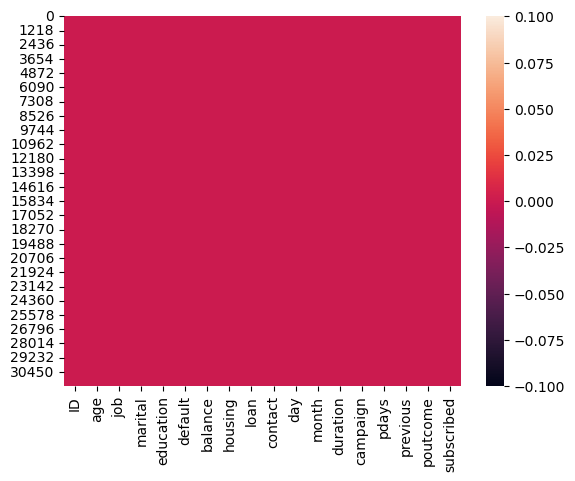

In [11]:
sns.heatmap(df.isnull())

by creating heatmap of null values so we can say in this dataset we do not have the null values

In [12]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

this are the unique values present in the dataset

In [13]:
df.nunique().to_frame()

,0
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


total number of unique values present in the dataset

In [14]:
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

out of 31647  customers only 3715('yes') customers they subscribed and rest of the 27932('no') customers they did not subscribed

In [15]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


as we can see in this dataset in the 'balance' feature and the 'duration', feature 'pdays', 'previous' features  the mean value is greater than the median value('50%') so it means our this features are rightly skewed  

also we have difference between their ('75%') value and the ('maximum') value so there might be outliers present in the dataset

# separating the numerical_columns and the categorical_columns

In [16]:
numerical_col=[]
categorical_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append([i])
    else:
        categorical_col.append([i])
        
print('numerical columns',numerical_col)
print('\n')
print('categorical columns',categorical_col)

numerical columns [['ID'], ['age'], ['balance'], ['day'], ['duration'], ['campaign'], ['pdays'], ['previous']]


categorical columns [['job'], ['marital'], ['education'], ['default'], ['housing'], ['loan'], ['contact'], ['month'], ['poutcome'], ['subscribed']]


# Data Analysis 

univariate

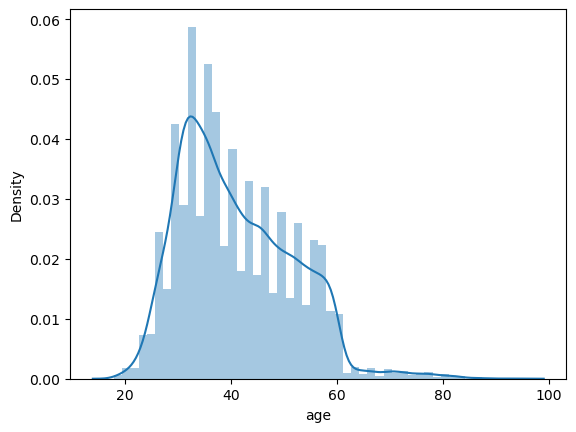

In [17]:
sns.distplot(df['age'])
plt.show()

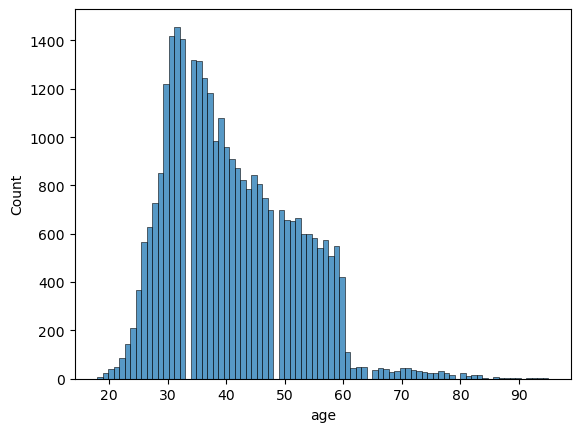

In [18]:
sns.histplot(x='age',data=df,)
plt.show()

in the above histplot we can see between the age of 30 to 35 frequency is high it means our most of the customer they are in this range of age

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


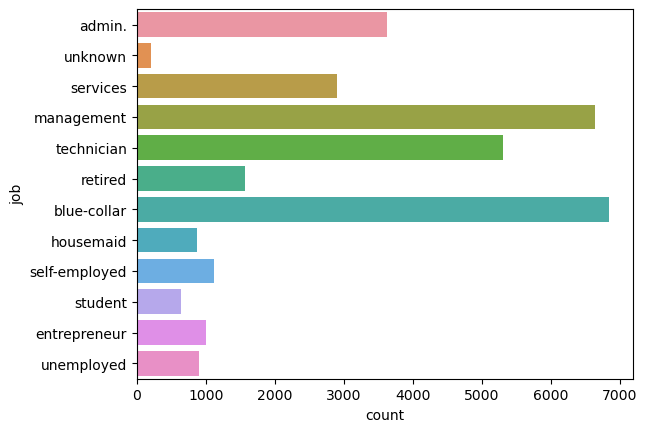

In [19]:
print(df['job'].value_counts())
sns.countplot(y='job',data=df)
plt.show()

our most of the customer so they are from 'blue-collar','management','technician' jobs

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


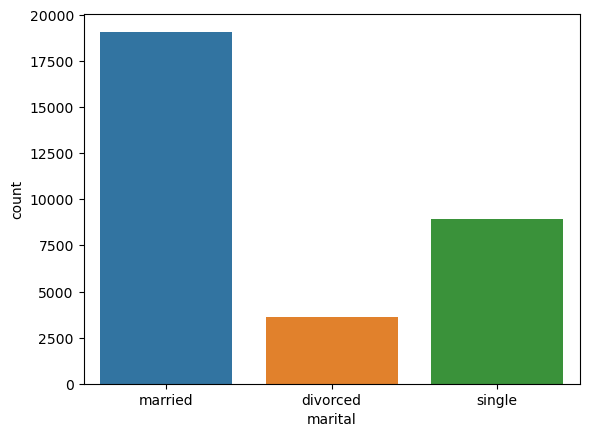

In [20]:
print(df['marital'].value_counts())
sns.countplot(x='marital',data=df)
plt.show()

the 'married', count is high than the 'divorced', and 'single'.

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


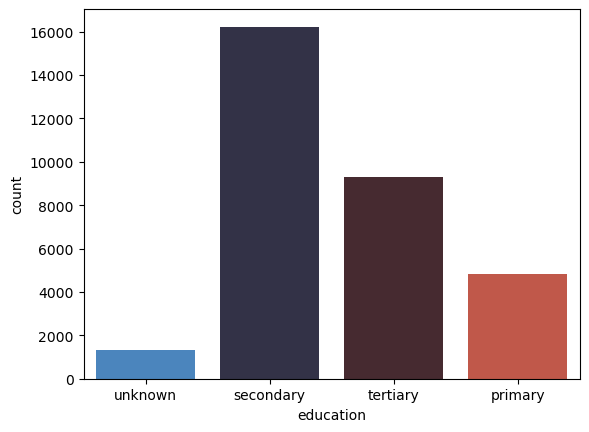

In [21]:
print(df['education'].value_counts())
sns.countplot(x='education',data=df,palette='icefire')
plt.show()

the 'secondary', count is high than the other options

In [22]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


no     31062
yes      585
Name: default, dtype: int64


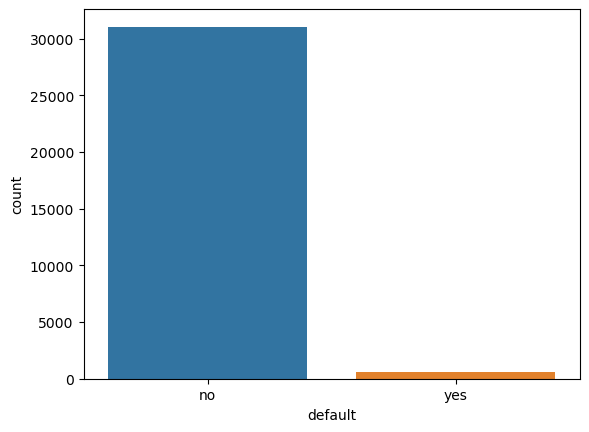

In [23]:
print(df['default'].value_counts())
sns.countplot(x='default',data=df)
plt.show()

our most of the customers so their credit score is not in the default 

yes    17584
no     14063
Name: housing, dtype: int64


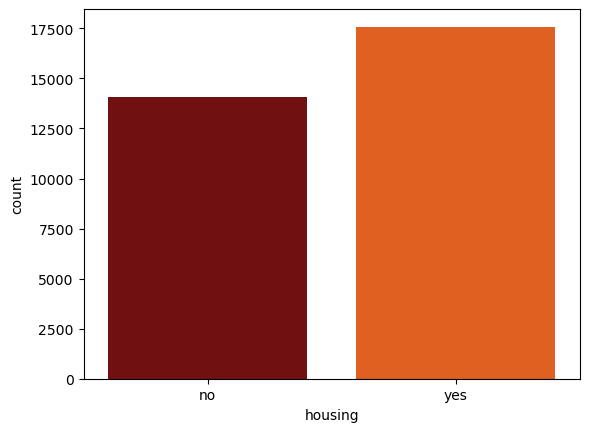

In [24]:
print(df['housing'].value_counts())
sns.countplot(x='housing',data=df,palette='gist_heat')
plt.show()

there is not much difference between the customers who have taken the housing loan and who have not taken the housing loan.

but the customers who have taken the housing loan('yes') their count is high.

no     26516
yes     5131
Name: loan, dtype: int64


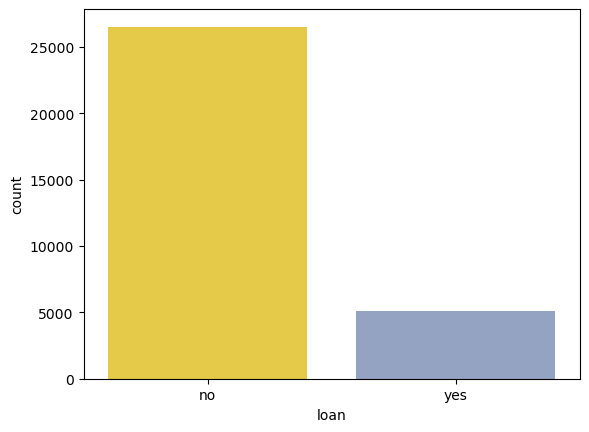

In [25]:
print(df['loan'].value_counts())
sns.countplot(x='loan',data=df,palette='Set2_r')
plt.show()

here the count is hign on ('no') it means our most of the customers they did not take any personal loan

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


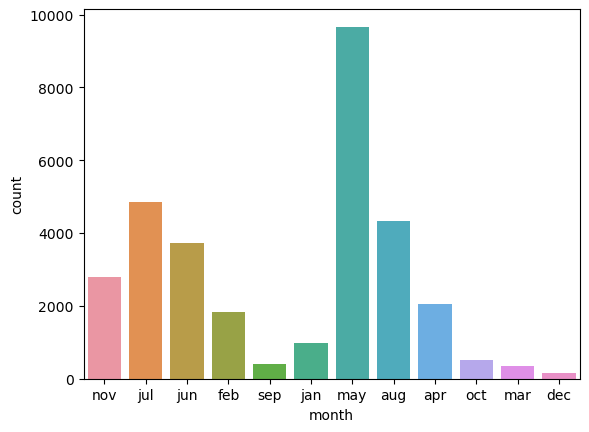

In [26]:
print(df['month'].value_counts())
sns.countplot(x='month',data=df)
plt.show()

in the month of ('may') bank  approached lot off customers

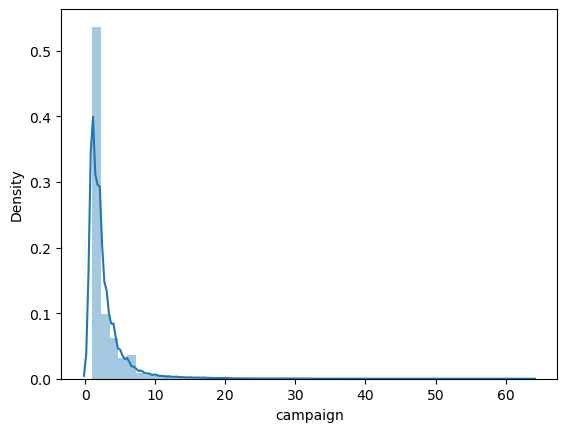

In [27]:
sns.distplot(df['campaign'])
plt.show()

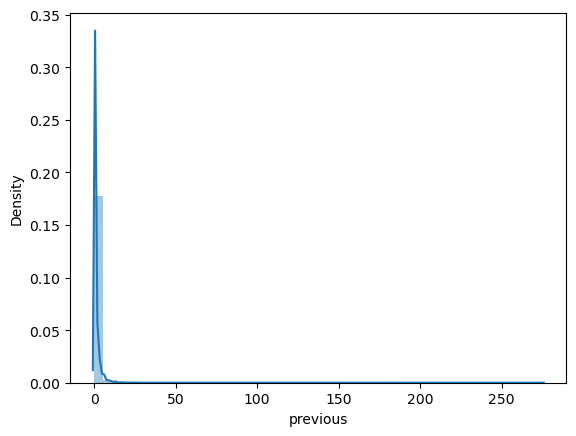

In [28]:
sns.distplot(df['previous'])
plt.show()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


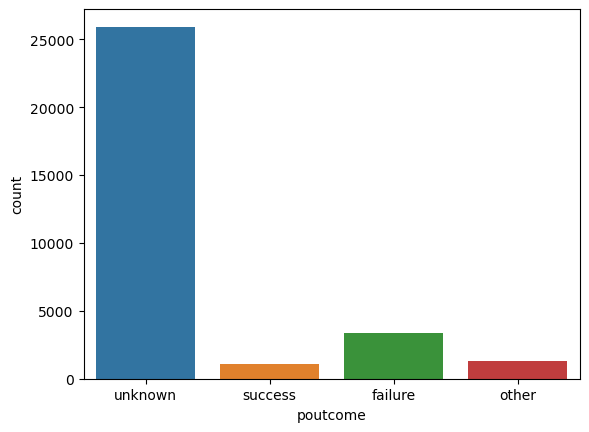

In [29]:
print(df['poutcome'].value_counts())
sns.countplot(x='poutcome',data=df)
plt.show()

in this countplot as  we can see most of the customers so they did not give any response of the campaign so because of that the count of ('unknown') is high.

no     27932
yes     3715
Name: subscribed, dtype: int64


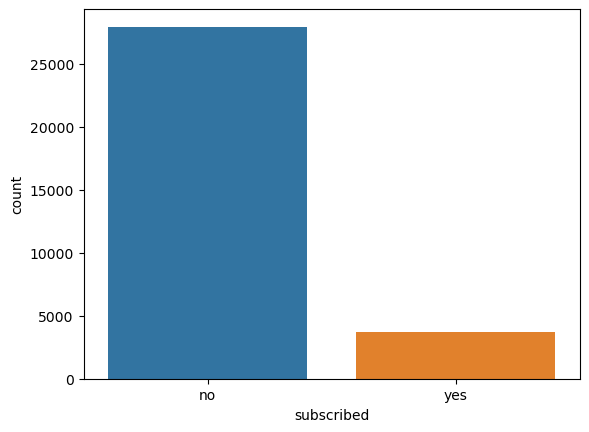

In [30]:
print(df['subscribed'].value_counts())
sns.countplot(x='subscribed',data=df)
plt.show()

in  the  countplot the count of ('No') is high it means  we have to make some changes in the campaign and  in the product also.

# Biavariate analysis

In [31]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


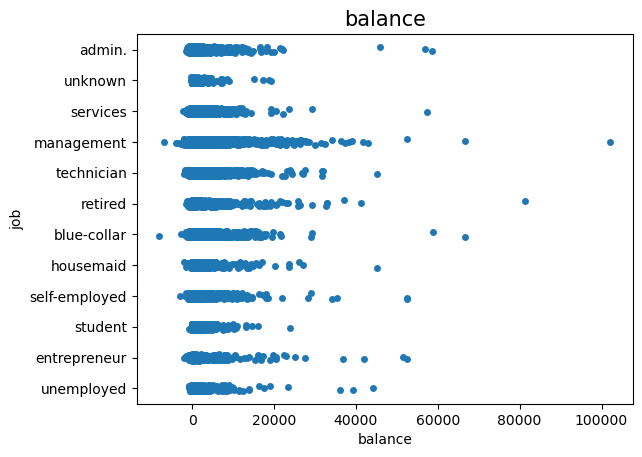

In [32]:
sns.stripplot(y='job',x='balance',data=df)
plt.title('balance',fontsize=15)
plt.show()

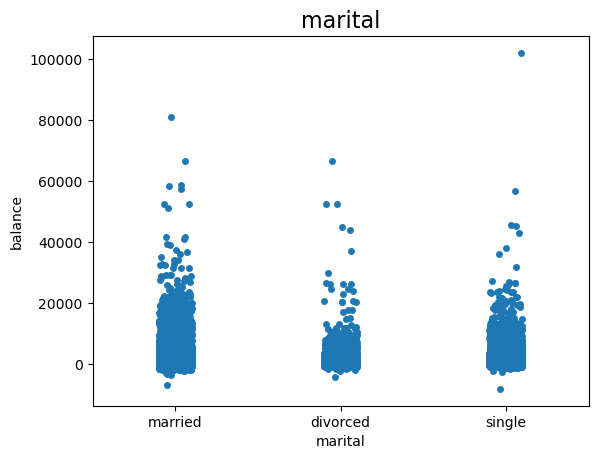

In [33]:
sns.stripplot(x='marital',y='balance',data=df)
plt.title('marital',fontsize=16)
plt.show()

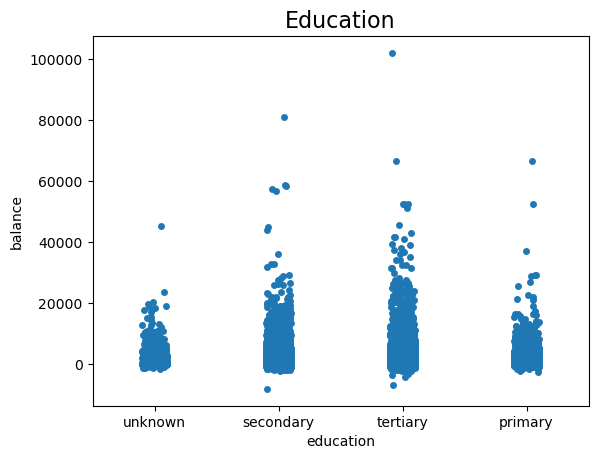

In [34]:
sns.stripplot(x='education',y='balance',data=df)
plt.title('Education',fontsize=16)
plt.show()

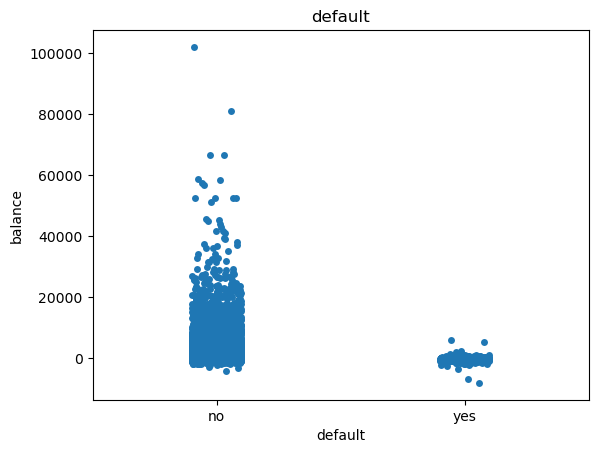

In [35]:
sns.stripplot(x='default',y='balance',data=df)
plt.title('default')
plt.show()

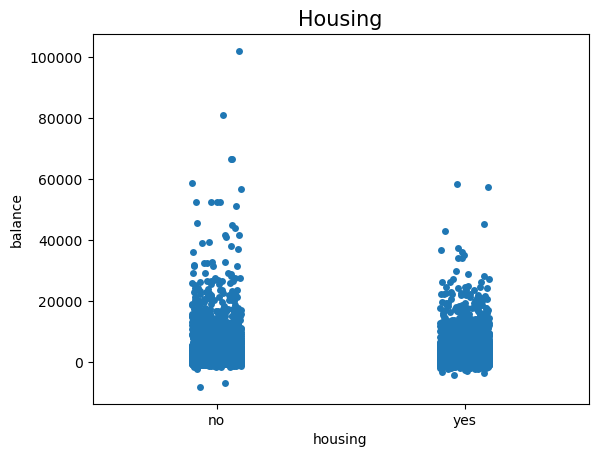

In [36]:
sns.stripplot(x='housing',y='balance',data=df)
plt.title('Housing',fontsize=15)
plt.show()

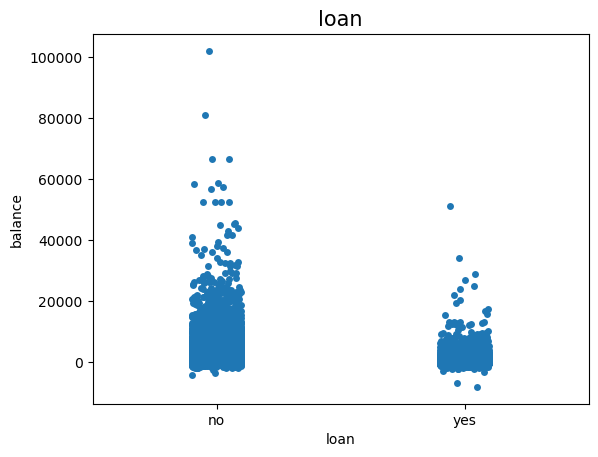

In [37]:
sns.stripplot(x='loan',y='balance',data=df)
plt.title('loan',fontsize=15)
plt.show()

in the above  strip plot count is high on ('No')

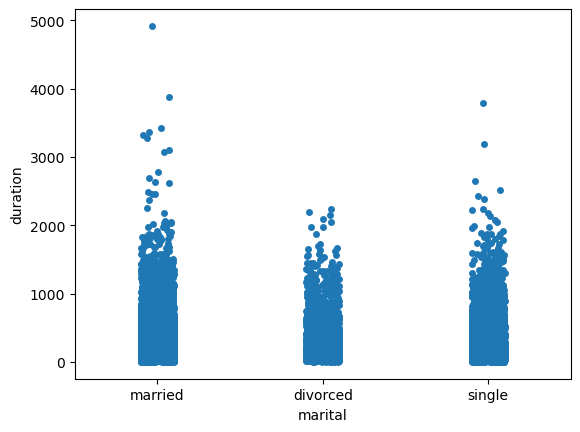

In [38]:
sns.stripplot(x='marital',y='duration',data=df)
plt.show()

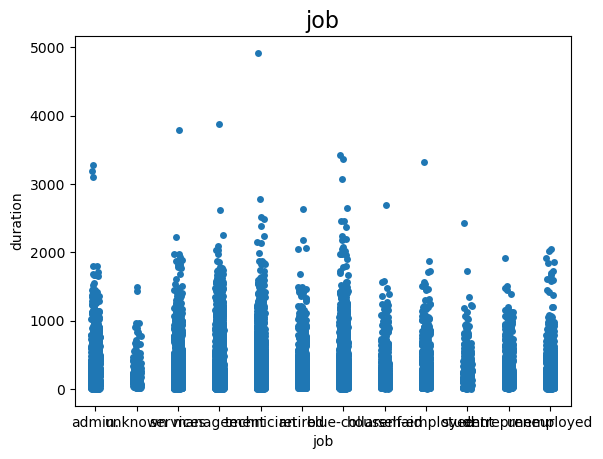

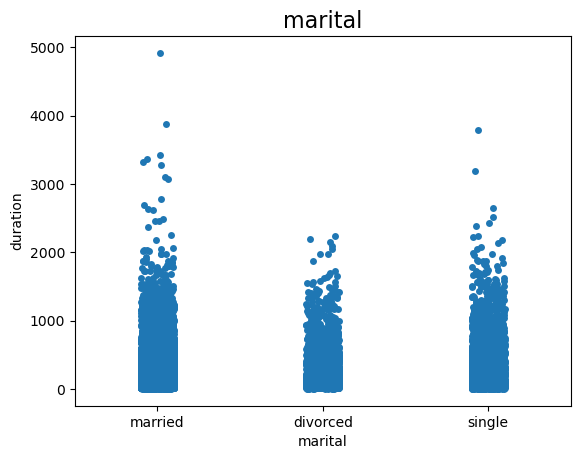

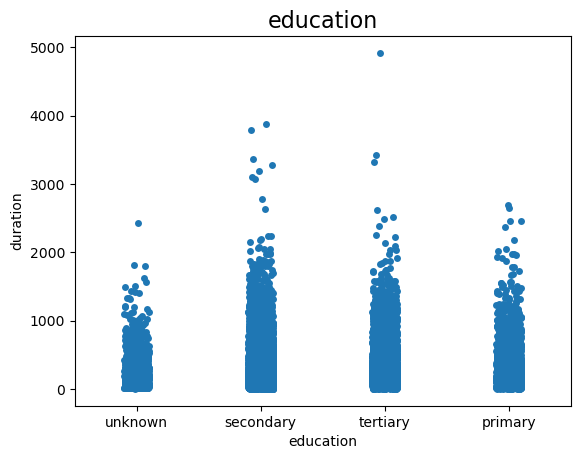

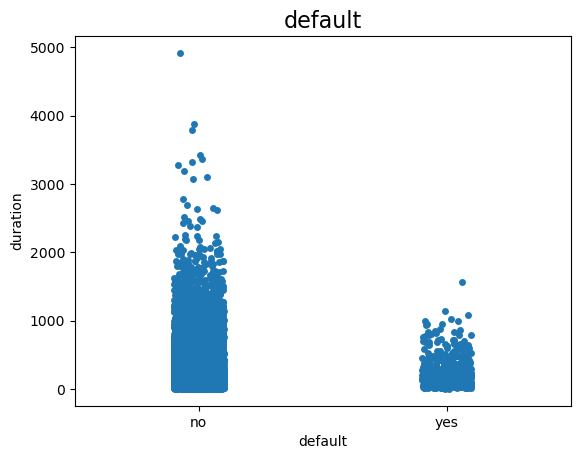

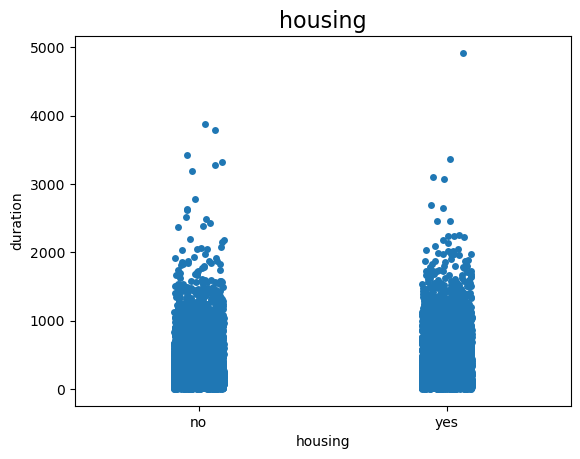

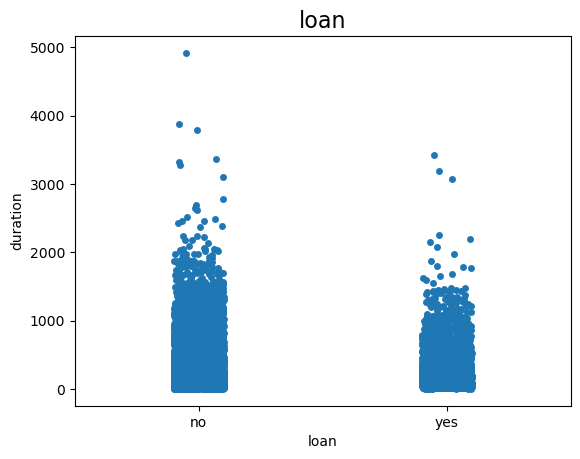

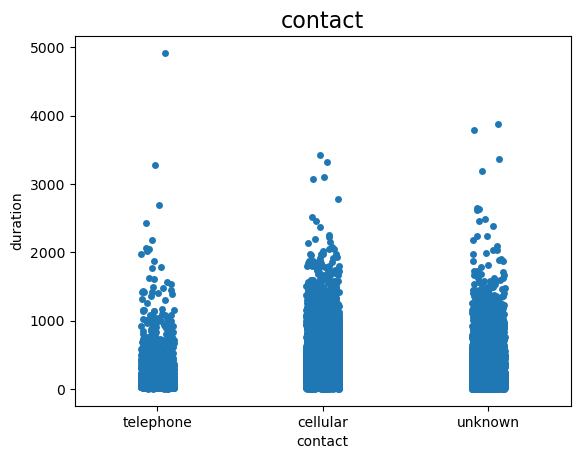

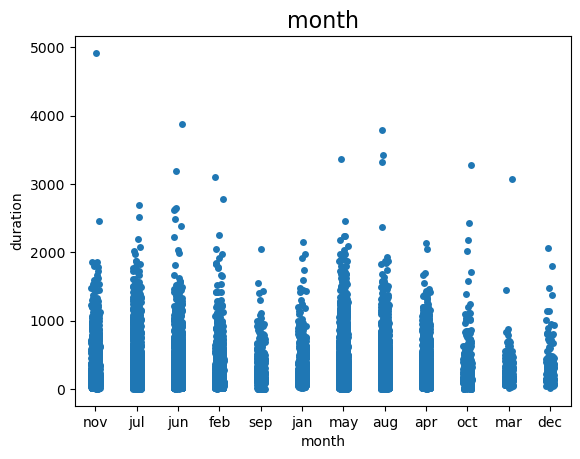

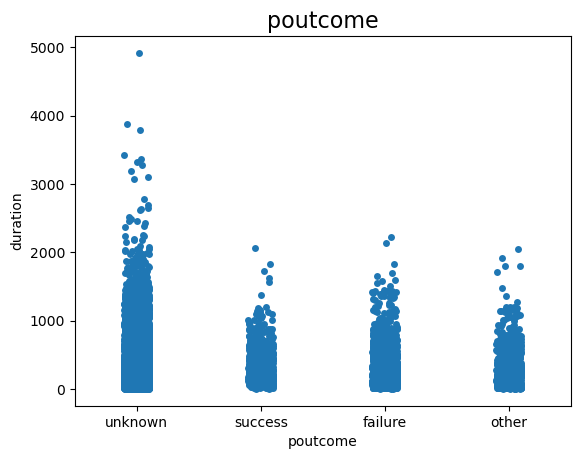

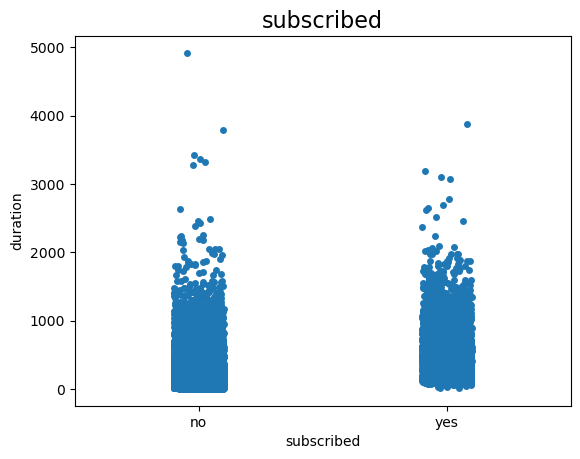

In [39]:
for i in df.columns:
    if df.dtypes[i]=='object':
        sns.stripplot(x=i,y='duration',data=df)
        plt.title(i,fontsize=16)
        plt.show()

# multi variate analysis

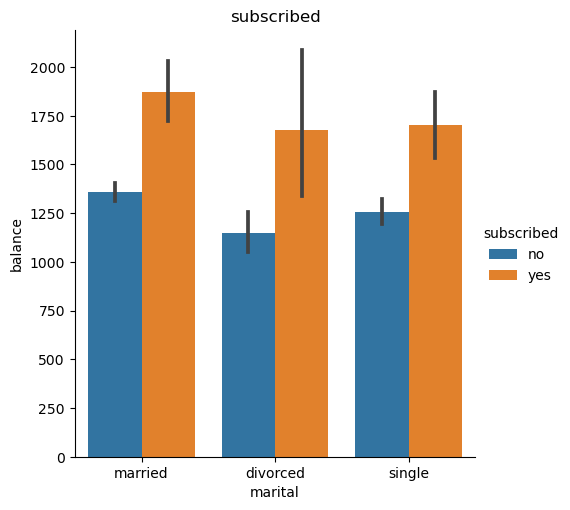

In [40]:
sns.catplot(kind='bar',x='marital',y='balance',hue='subscribed',data=df)
plt.title(i)
plt.show()

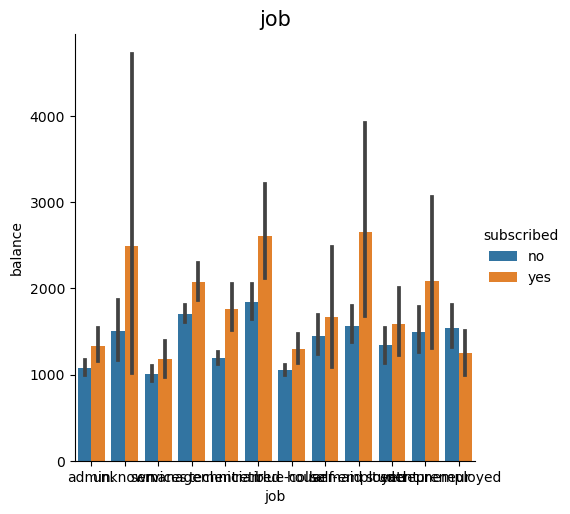

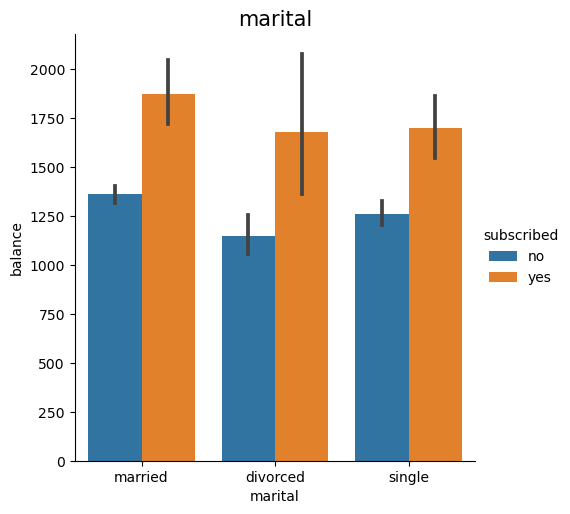

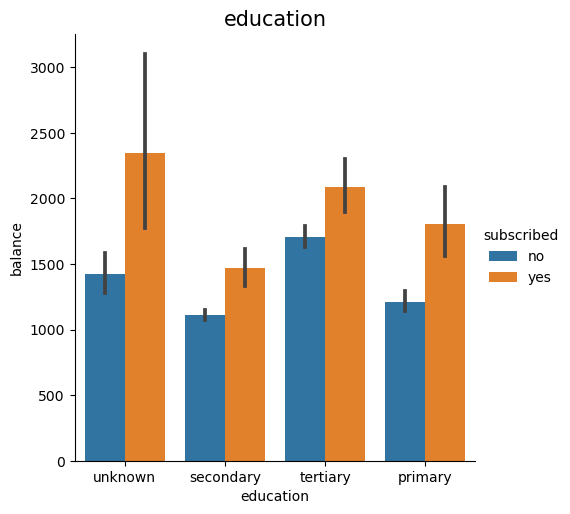

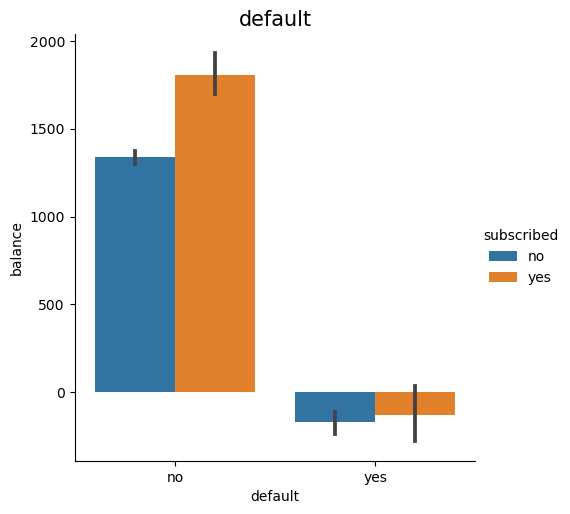

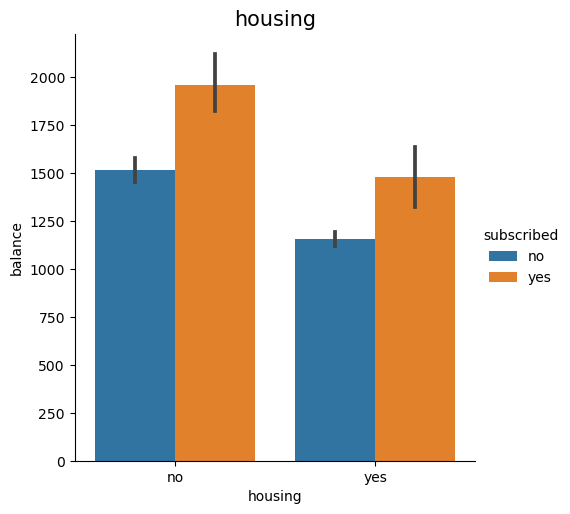

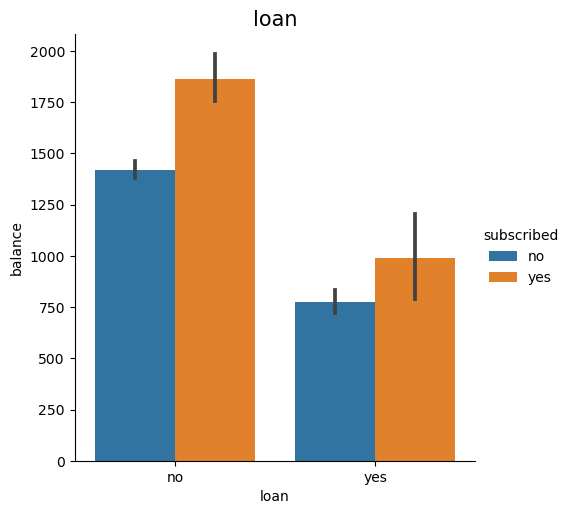

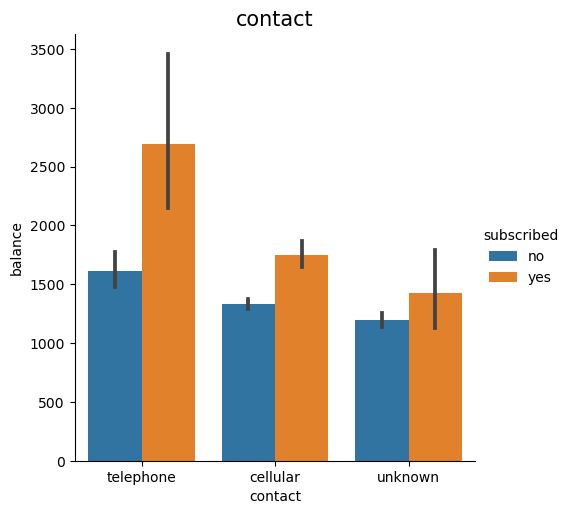

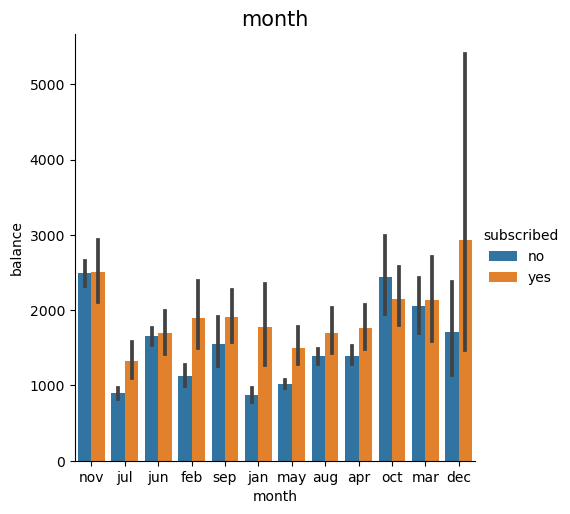

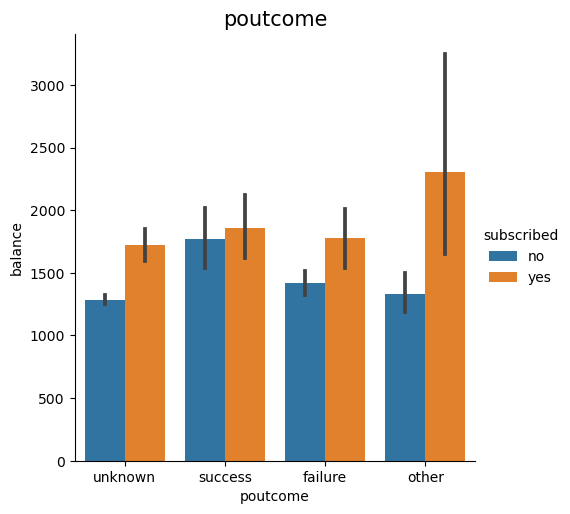

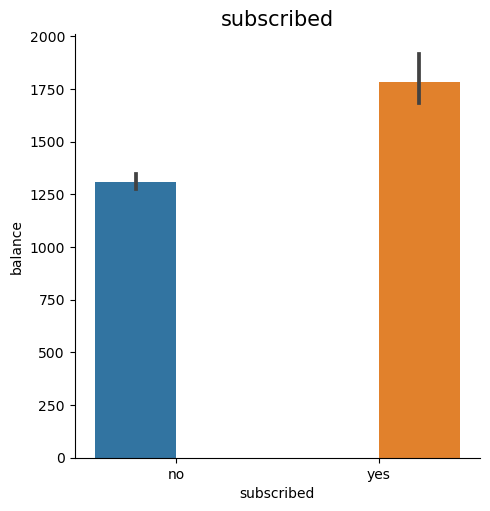

In [41]:
for i in df.columns:
    if df.dtypes[i]=='object':
        sns.catplot(x=i,y='balance',hue='subscribed',kind='bar',data=df)
        plt.title(i,fontsize=15)
        plt.show()

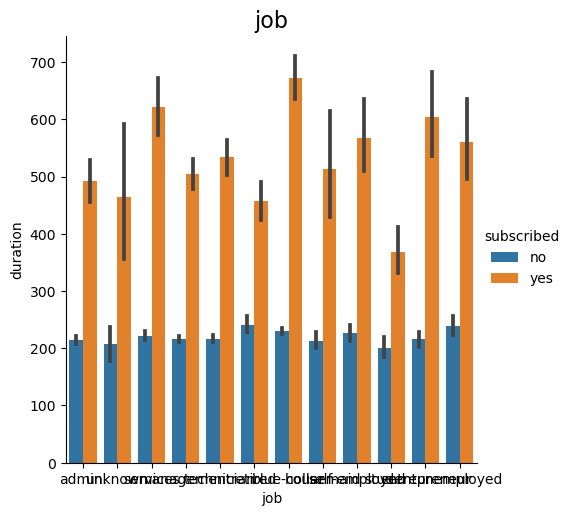

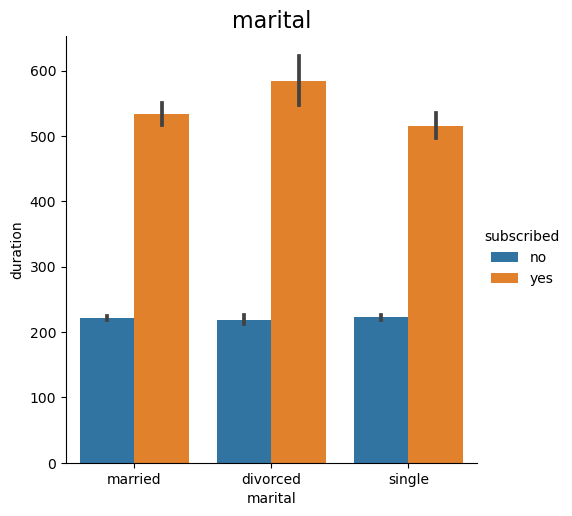

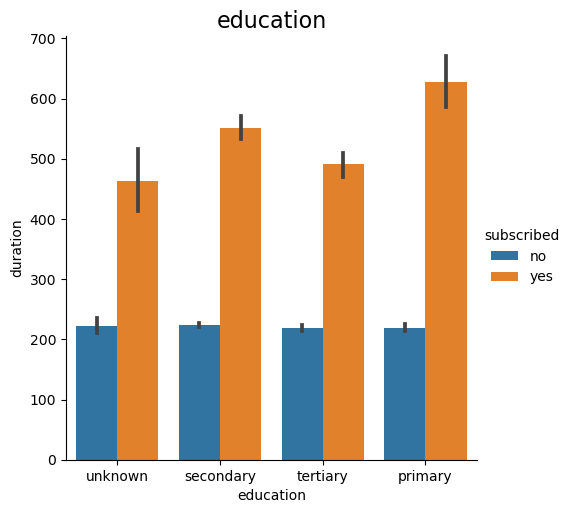

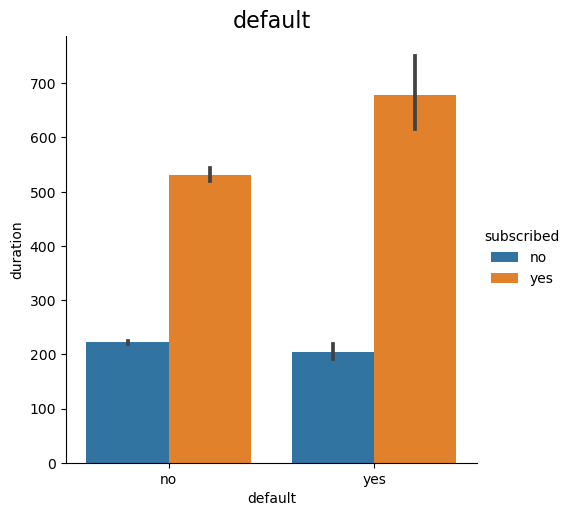

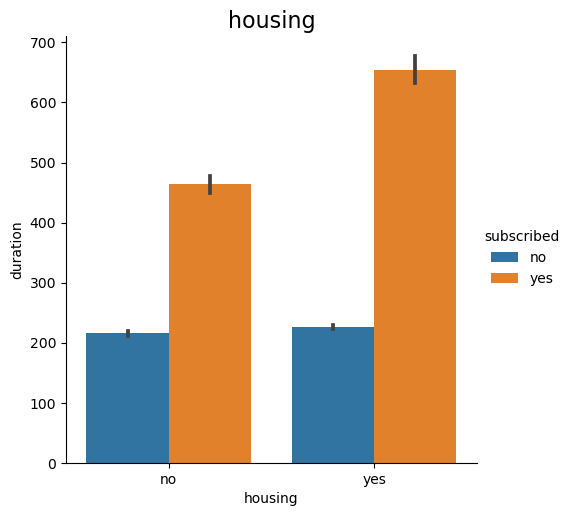

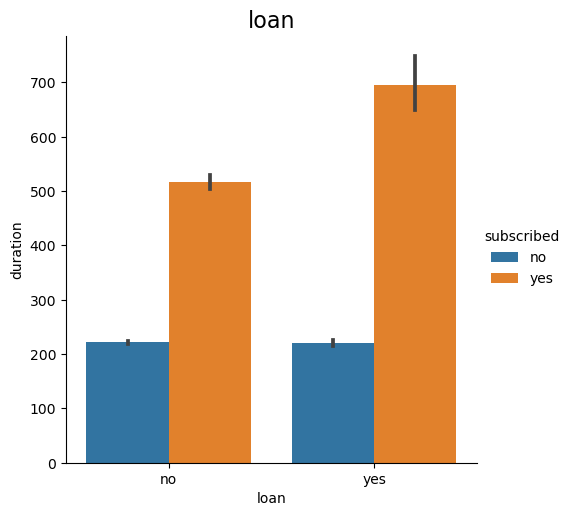

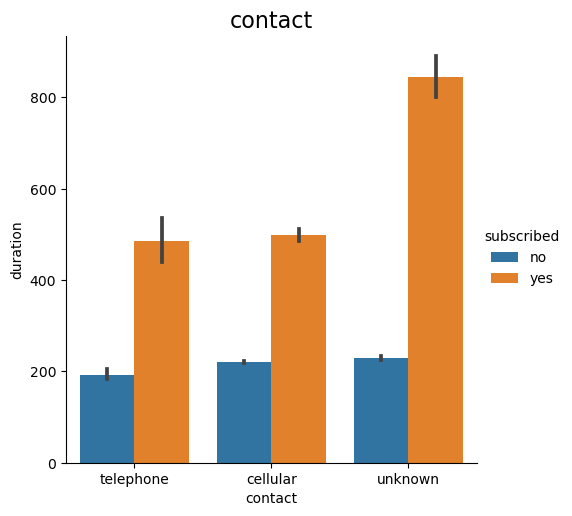

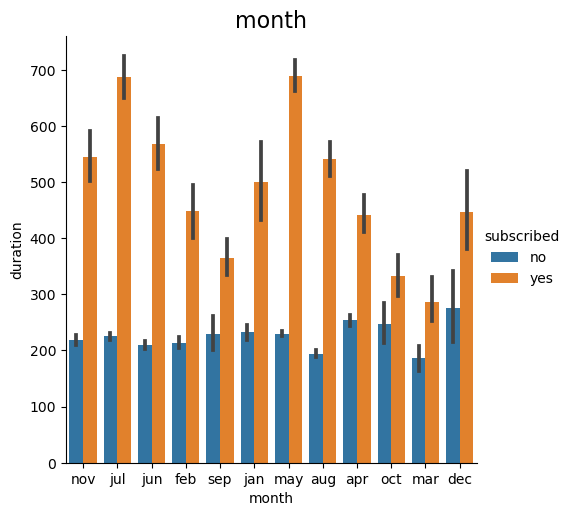

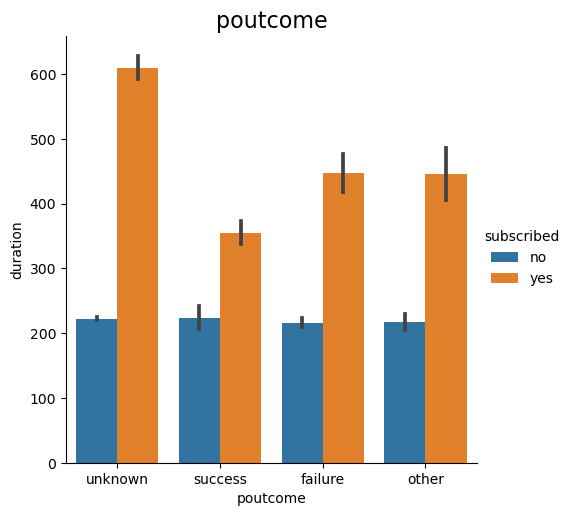

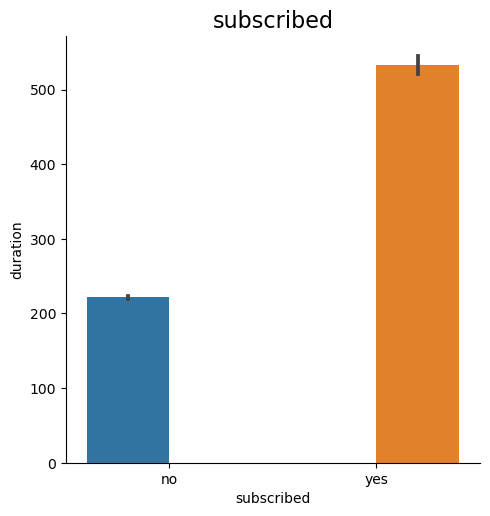

In [42]:
for i in df.columns:
    if df.dtypes[i]=='object':
        sns.catplot(x=i,y='duration',hue='subscribed',kind='bar',data=df)
        plt.title(i,fontsize=16)
        plt.show()

# checking the outliers

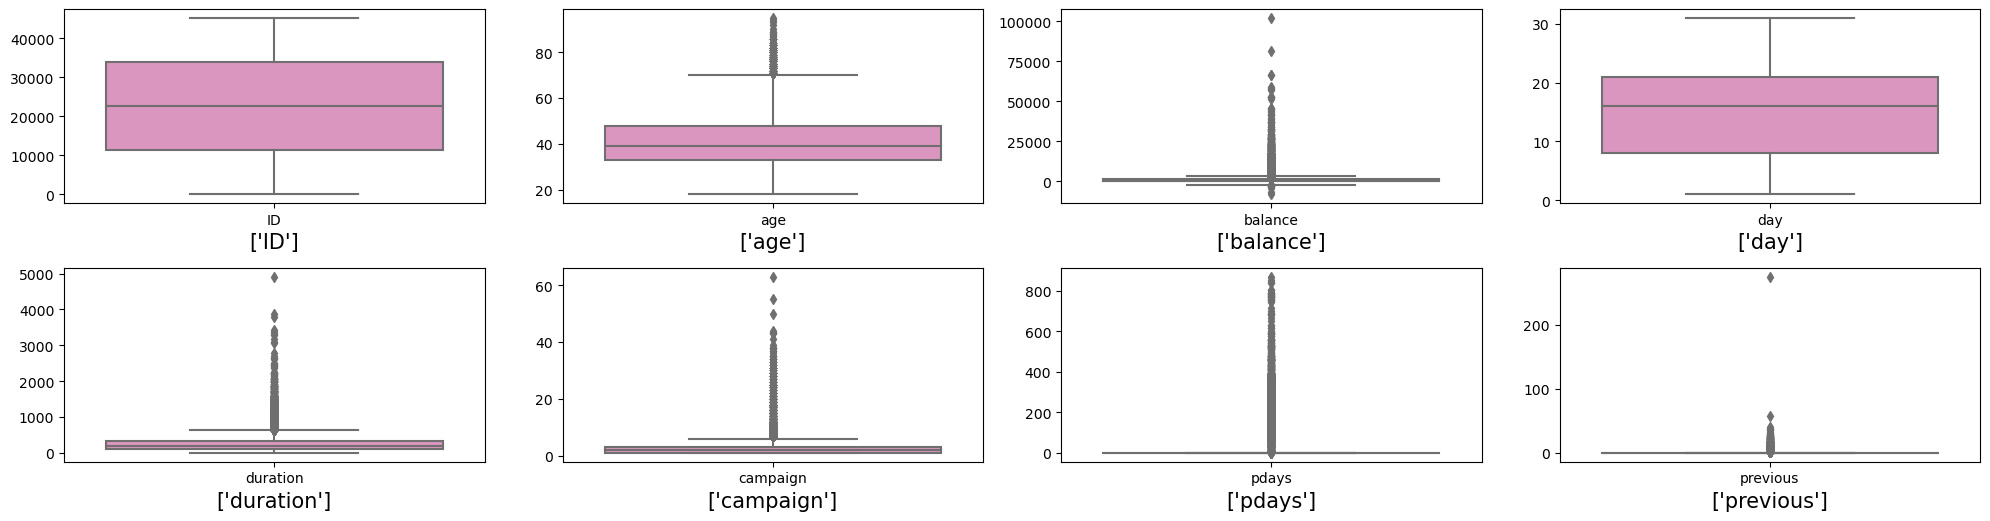

In [43]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [44]:
df.skew()

ID           0.005851
age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [45]:
# removing the outliers
for i in df.columns:
    if df.dtypes[i]!='object':
        df[i]=np.cbrt(df[i])
        

In [46]:
df.skew()

ID         -0.857022
age         0.286363
balance    -0.086014
day        -0.586331
duration    0.647275
campaign    1.667938
pdays       1.779036
previous    2.079738
dtype: float64

# Encoding using (Label Encoder)

In [47]:
lb=LabelEncoder()
for i in df.columns:
    if df.dtypes[i]=='object':
        df[i]=lb.fit_transform(df[i].values.reshape(-1,1))
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,29.666681,3.825862,0,1,3,0,12.456918,0,0,1,2.668402,9,3.530348,1.259921,-1.000000,0.000000,3,0
1,34.362895,3.141381,11,1,1,0,1.442250,0,0,0,2.714418,5,4.497941,1.259921,-1.000000,0.000000,3,0
2,24.836263,3.000000,7,1,1,0,9.622603,1,0,0,2.620741,5,6.214465,1.000000,-1.000000,0.000000,3,0
3,35.293317,3.848501,4,0,2,0,14.868480,0,0,0,2.802039,6,9.535417,1.000000,4.379519,1.442250,2,1
4,31.017680,3.141381,9,1,1,0,4.918685,1,0,0,1.587401,3,7.243156,1.000000,-1.000000,0.000000,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,33.166286,3.072317,4,2,2,0,0.000000,1,0,0,2.289428,8,4.876999,1.259921,-1.000000,0.000000,3,0
31643,34.250173,3.756286,4,0,2,0,7.243156,0,1,0,1.709976,6,7.594363,1.259921,-1.000000,0.000000,3,1
31644,27.012340,3.174802,4,2,2,0,6.782423,0,0,0,1.912931,1,3.332222,1.442250,-1.000000,0.000000,3,0
31645,33.782931,3.848501,9,1,1,0,6.082202,1,0,1,2.466212,8,2.802039,1.912931,6.958943,2.289428,0,0


# checking correlation

In [48]:
corr=df.corr()
corr

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.000095,0.072556,0.069269,0.095431,-0.039474,0.126085,-0.227330,-0.055590,-0.782454,0.005090,-0.254567,-0.004738,-0.056463,0.423400,0.413821,-0.391183,0.246909
age,0.000095,1.000000,-0.027208,-0.423149,-0.101250,-0.014852,0.097645,-0.168935,-0.008282,0.031325,-0.005077,-0.038968,-0.014250,0.023006,-0.011360,-0.000488,0.008563,0.009310
job,0.072556,-0.027208,1.000000,0.066124,0.170347,-0.005217,0.030541,-0.125347,-0.039049,-0.078253,0.008505,-0.089384,0.001740,0.004734,-0.007784,0.000043,0.007101,0.038921
marital,0.069269,-0.423149,0.066124,1.000000,0.107547,-0.009591,0.029260,-0.017846,-0.041654,-0.040180,-0.014405,-0.003834,0.013765,-0.020674,0.025247,0.026130,-0.019770,0.046043
education,0.095431,-0.101250,0.170347,0.107547,1.000000,-0.006774,0.075759,-0.095376,-0.045950,-0.112000,0.006779,-0.055967,0.002867,-0.001402,0.020848,0.029767,-0.019007,0.066051
default,-0.039474,-0.014852,-0.005217,-0.009591,-0.006774,1.000000,-0.198400,-0.011823,0.081567,0.014053,0.007001,0.004694,-0.009781,0.018914,-0.036851,-0.036702,0.035067,-0.020168
balance,0.126085,0.097645,0.030541,0.029260,0.075759,-0.198400,1.000000,-0.087058,-0.142789,-0.047563,-0.006513,-0.002360,0.038476,-0.035939,0.060453,0.070936,-0.055961,0.097107
housing,-0.227330,-0.168935,-0.125347,-0.017846,-0.095376,-0.011823,-0.087058,1.000000,0.036244,0.195103,-0.007571,0.271442,0.001012,-0.033177,0.081725,0.053207,-0.092677,-0.141092
loan,-0.055590,-0.008282,-0.039049,-0.041654,-0.045950,0.081567,-0.142789,0.036244,1.000000,-0.009213,0.013078,0.024186,-0.011323,0.006838,-0.025042,-0.025072,0.010919,-0.072266
contact,-0.782454,0.031325,-0.078253,-0.040180,-0.112000,0.014053,-0.047563,0.195103,-0.009213,1.000000,-0.034079,0.362934,-0.032611,0.014552,-0.281906,-0.273055,0.272083,-0.150051


<Axes: >

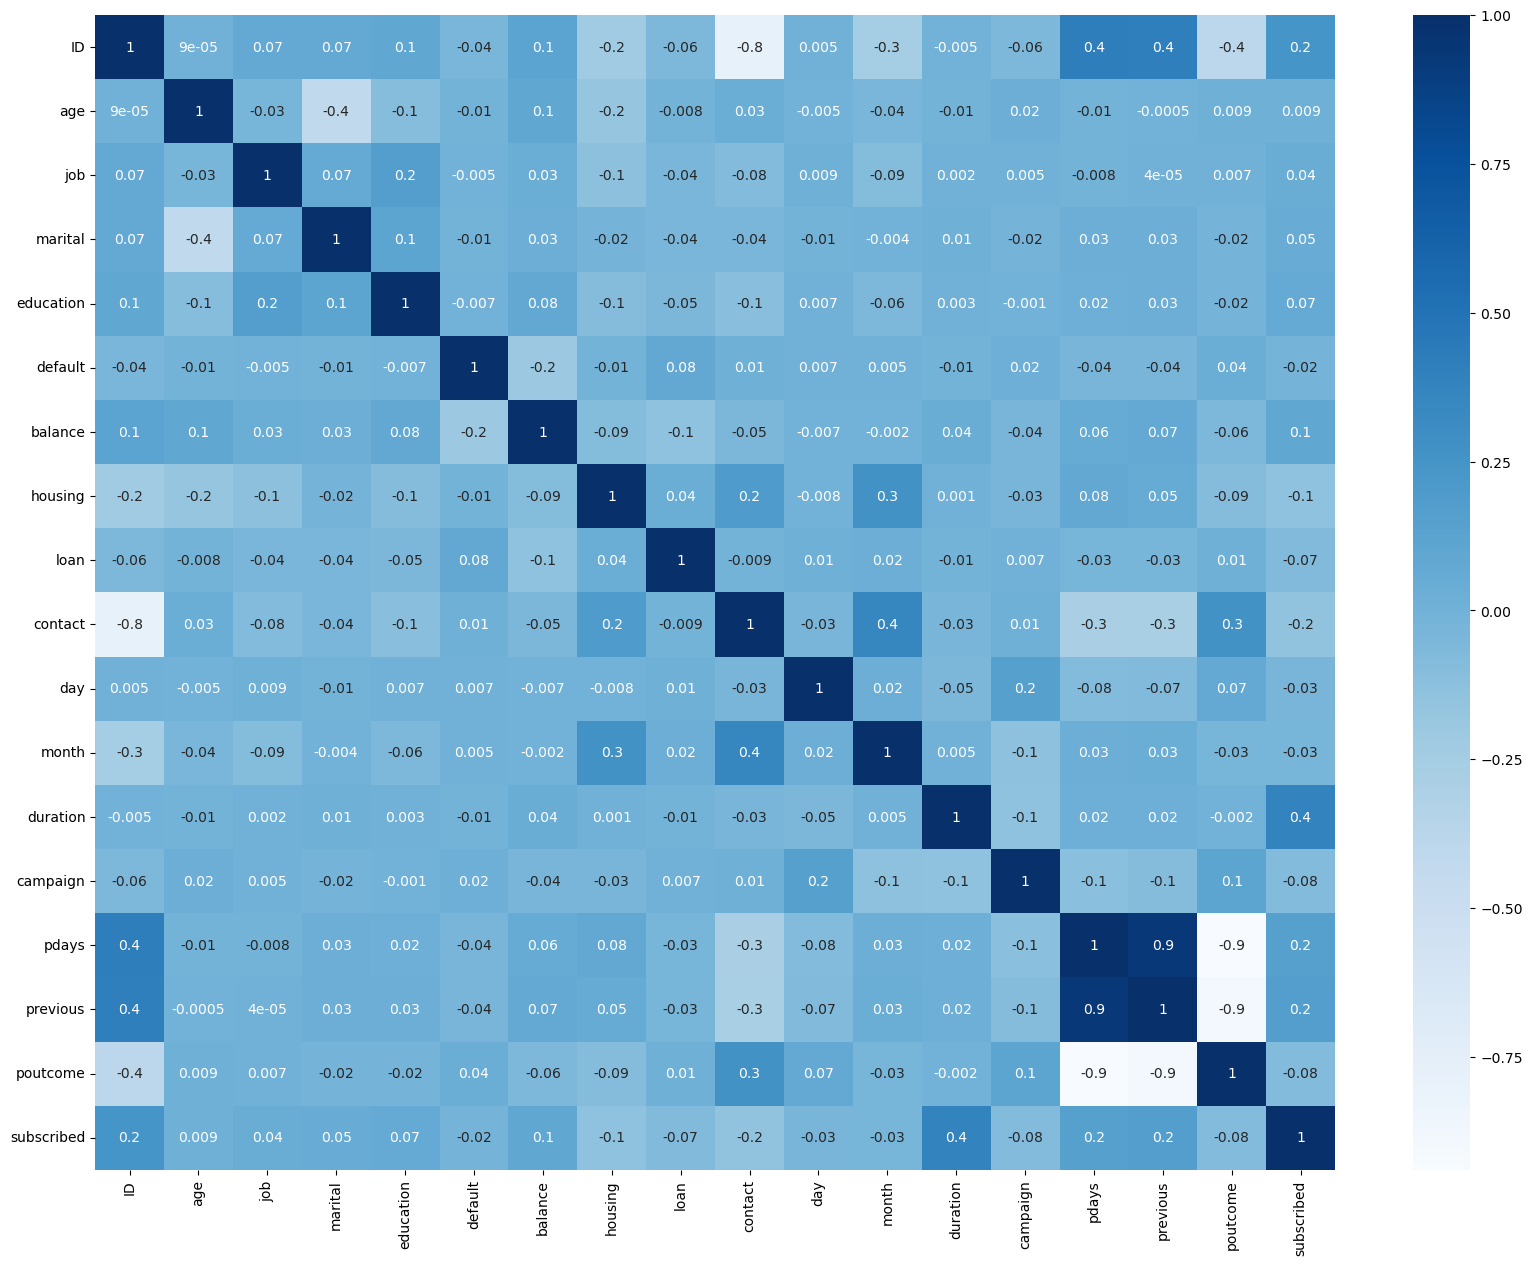

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,cmap='Blues',annot=True,fmt='.1g')

here features are not that much highly  correlated with the target variable.

the maximum value of the correlation is 0.07

and the maximum value of the negative correlaton is -0.08

In [50]:
corr['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.379716
ID            0.246909
previous      0.167908
pdays         0.152555
balance       0.097107
education     0.066051
marital       0.046043
job           0.038921
age           0.009310
default      -0.020168
month        -0.028088
day          -0.034044
loan         -0.072266
poutcome     -0.080895
campaign     -0.082134
housing      -0.141092
contact      -0.150051
Name: subscribed, dtype: float64

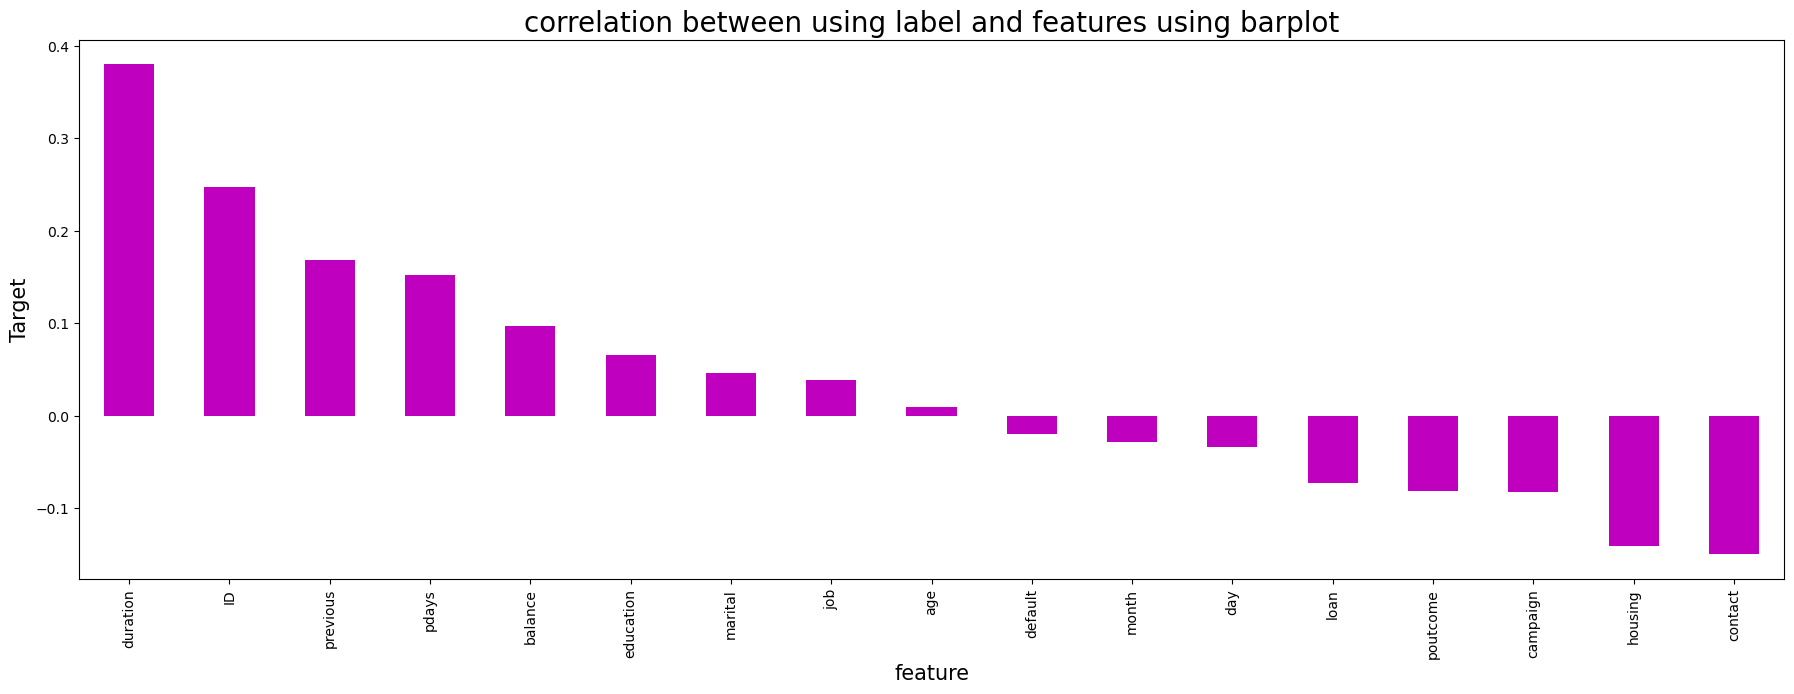

In [51]:
plt.figure(figsize=(22,7))
df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between using label and features using barplot',fontsize=20)
plt.show()

# separating the features

In [52]:
x=df.drop('subscribed',axis=1)
y=df['subscribed']

# feature Scaling using StandardScaler 

In [53]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.430099,1.383398,-1.324317,-0.275405,2.369229,-0.137234,0.757778,-1.118201,-0.439893,0.395076,0.502919,1.154007,-1.328474,-0.127816,-0.461627,-0.449105,0.441777
1,1.108857,-0.961854,2.037729,-0.275405,-0.300345,-0.137234,-0.911548,-1.118201,-0.439893,-0.716695,0.593174,-0.177462,-0.775734,-0.127816,-0.461627,-0.449105,0.441777
2,-0.268057,-1.446270,0.815167,-0.275405,-0.300345,-0.137234,0.328224,0.894294,-0.439893,-0.716695,0.409439,-0.177462,0.204835,-0.873593,-0.461627,-0.449105,0.441777
3,1.243334,1.460966,-0.101755,-1.922374,1.034442,-0.137234,1.123262,-1.118201,-0.439893,-0.716695,0.765033,0.155405,2.101938,-0.873593,1.542654,2.189741,-0.576498
4,0.625363,-0.961854,1.426448,-0.275405,-0.300345,-0.137234,-0.384677,0.894294,-0.439893,-0.716695,-1.617332,-0.843197,0.792477,-0.873593,-0.461627,-0.449105,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,0.935907,-1.198489,-0.101755,1.371563,1.034442,-0.137234,-1.130128,0.894294,-0.439893,-0.716695,-0.240391,0.821140,-0.559197,-0.127816,-0.461627,-0.449105,0.441777
31643,1.092565,1.145007,-0.101755,-1.922374,1.034442,-0.137234,-0.032392,-1.118201,2.273280,-0.716695,-1.376916,0.155405,0.993105,-0.127816,-0.461627,-0.449105,0.441777
31644,0.046458,-0.847342,-0.101755,1.371563,1.034442,-0.137234,-0.102219,-1.118201,-0.439893,-0.716695,-0.978844,-1.508931,-1.441655,0.395329,-0.461627,-0.449105,0.441777
31645,1.025033,1.460966,1.426448,-0.275405,-0.300345,-0.137234,-0.208341,0.894294,-0.439893,0.395076,0.106349,0.821140,-1.744523,1.745828,2.503686,3.739801,-2.613048


# checking variance inflation factor

In [54]:
# finding variance inflation factor in each scaled column 

vif=pd.DataFrame()
vif['variables']=x.columns
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,variables,VIF values
0,ID,3.126784
1,age,1.298488
2,job,1.050141
3,marital,1.249609
4,education,1.066142
5,default,1.046127
6,balance,1.103240
7,housing,1.216578
8,loan,1.036698
9,contact,2.886796


as we can see p days is  creating the multicolinearity issue. let's drop this feature for handling the multicolinearity issue

In [55]:
x=x.drop('pdays',axis=1)


In [56]:
vif=pd.DataFrame()
vif['variables']=x.columns
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,variables,VIF values
0,ID,3.085591
1,age,1.298115
2,job,1.049914
3,marital,1.249580
4,education,1.065974
5,default,1.046122
6,balance,1.102732
7,housing,1.212898
8,loan,1.036138
9,contact,2.880114


here we can consider our threshold value is 5 so we have resolved the issue of multicolinearity

# Oversampling by using smote method

In [57]:
y.value_counts()


0    27932
1     3715
Name: subscribed, dtype: int64

as we can see the count is high on 0('no') we are having huge difference between both the output so we have to balance this difference for increasing the performance of the model

In [58]:
smt=SMOTE()
x,y,=smt.fit_resample(x,y)

In [59]:
y.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

here we have balanced both the variable

# Modeling

# Creating Train test split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

# Logistic Regression

In [61]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg_pred=lg.predict(x_test)
lg_train=lg.predict(x_train)
print('accuracy_score on training data',accuracy_score(y_train,lg_train))
print('accuracy_score on test data',accuracy_score(y_test,lg_pred))
print('confusion_matrix',confusion_matrix(y_test,lg_pred))
print('classification_report',classification_report(y_test,lg_pred))

accuracy_score on training data 0.8478416530278232
accuracy_score on test data 0.8381861575178997
confusion_matrix [[6939 1483]
 [1229 7109]]
classification_report               precision    recall  f1-score   support

           0       0.85      0.82      0.84      8422
           1       0.83      0.85      0.84      8338

    accuracy                           0.84     16760
   macro avg       0.84      0.84      0.84     16760
weighted avg       0.84      0.84      0.84     16760



# svc (Support vector classifier)

In [62]:
svr=SVC()
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)
svr_train=svr.predict(x_train)
print('accuracy_score on train data',accuracy_score(y_train,svr_train))
print('accuracy_score on test data',accuracy_score(y_test,svr_pred))
print('confusion_matrix',confusion_matrix(y_test,svr_pred))
print('classification_report',classification_report(y_test,svr_pred))


accuracy_score on train data 0.9080400981996727
accuracy_score on test data 0.8948090692124105
confusion_matrix [[7100 1322]
 [ 441 7897]]
classification_report               precision    recall  f1-score   support

           0       0.94      0.84      0.89      8422
           1       0.86      0.95      0.90      8338

    accuracy                           0.89     16760
   macro avg       0.90      0.90      0.89     16760
weighted avg       0.90      0.89      0.89     16760



# Decision Tree classifier

In [63]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train,y_train)
dtr_pred=dtr.predict(x_test)
dtr_train=dtr.predict(x_train)
print('accuracy_score on train data',accuracy_score(y_train,dtr_train))
print('accuracy_score on testing data',accuracy_score(y_test,dtr_pred))
print('confusin_matrix',confusion_matrix(y_test,dtr_pred))
print('classification_report',classification_report(y_test,dtr_pred))

accuracy_score on train data 1.0
accuracy_score on testing data 0.911217183770883
confusin_matrix [[7635  787]
 [ 701 7637]]
classification_report               precision    recall  f1-score   support

           0       0.92      0.91      0.91      8422
           1       0.91      0.92      0.91      8338

    accuracy                           0.91     16760
   macro avg       0.91      0.91      0.91     16760
weighted avg       0.91      0.91      0.91     16760



# Random Forest classifier

In [64]:
rfr=RandomForestClassifier()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
rfr_train=rfr.predict(x_train)
print('accuracy_score on training data',accuracy_score(y_train,rfr_train))
print('accuracy_score on testing data',accuracy_score(y_test,rfr_pred))
print('confusion_matrix',confusion_matrix(y_test,rfr_pred))
print('classification_report',classification_report(y_test,rfr_pred))

accuracy_score on training data 1.0
accuracy_score on testing data 0.9461217183770884
confusion_matrix [[7719  703]
 [ 200 8138]]
classification_report               precision    recall  f1-score   support

           0       0.97      0.92      0.94      8422
           1       0.92      0.98      0.95      8338

    accuracy                           0.95     16760
   macro avg       0.95      0.95      0.95     16760
weighted avg       0.95      0.95      0.95     16760



# Extra Tree classifier

In [65]:
etr=ExtraTreesClassifier()
etr.fit(x_train,y_train)
etr_pred=etr.predict(x_test)
etr_train=etr.predict(x_train)
print('accuracy_score on train data',accuracy_score(y_train,etr_train))
print('accuracy_score on testing data',accuracy_score(y_test,etr_pred))
print('confusion_matrix',confusion_matrix(y_test,etr_pred))
print('classification_report',classification_report(y_test,etr_pred))

accuracy_score on train data 1.0
accuracy_score on testing data 0.9587112171837708
confusion_matrix [[7833  589]
 [ 103 8235]]
classification_report               precision    recall  f1-score   support

           0       0.99      0.93      0.96      8422
           1       0.93      0.99      0.96      8338

    accuracy                           0.96     16760
   macro avg       0.96      0.96      0.96     16760
weighted avg       0.96      0.96      0.96     16760



# AdaBoost classifier

In [66]:
abr=AdaBoostClassifier()
abr.fit(x_train,y_train)
abr_pred=abr.predict(x_test)
abr_train=abr.predict(x_train)
print('accuracy_score on training data',accuracy_score(y_train,abr_train))
print('accuracy_score on testing data',accuracy_score(y_test,abr_pred))
print('confusin_matrix',confusion_matrix(y_test,abr_pred))
print('classification_report',classification_report(y_test,abr_pred))

accuracy_score on training data 0.8945887888707038
accuracy_score on testing data 0.8901551312649165
confusin_matrix [[7513  909]
 [ 932 7406]]
classification_report               precision    recall  f1-score   support

           0       0.89      0.89      0.89      8422
           1       0.89      0.89      0.89      8338

    accuracy                           0.89     16760
   macro avg       0.89      0.89      0.89     16760
weighted avg       0.89      0.89      0.89     16760



# Gradient Boosting classifier

In [67]:
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)
gbr_train=gbr.predict(x_train)
print('accuracy_score on training data',r2_score(y_train,gbr_train))
print('accuracy_score on testing data',r2_score(y_test,gbr_pred))
print('confusion_matrix',confusion_matrix(y_test,gbr_pred))
print('classification_report',classification_report(y_test,gbr_pred))

accuracy_score on training data 0.686475640013023
accuracy_score on testing data 0.6627600251292189
confusion_matrix [[7465  957]
 [ 456 7882]]
classification_report               precision    recall  f1-score   support

           0       0.94      0.89      0.91      8422
           1       0.89      0.95      0.92      8338

    accuracy                           0.92     16760
   macro avg       0.92      0.92      0.92     16760
weighted avg       0.92      0.92      0.92     16760



# Cross validation

In [68]:
score1=cross_val_score(lg,x,y,cv=5)
print(score1)
print(score1.mean())
print('difference between cross validation score and accuracy_score',(accuracy_score(y_test,lg_pred)-score1.mean())*100)

[0.83952385 0.85026403 0.84113488 0.85115904 0.84183673]
0.84478370780873
difference between cross validation score and accuracy_score -0.6597550290830312


In [69]:
score2=cross_val_score(svr,x,y)
print(score2)
print(score2.mean())
print('difference between the cross validation score and the accuracy_score',(accuracy_score(y_test,svr_pred)-score2.mean())*100)


[0.8909872  0.90414392 0.89984785 0.90745547 0.90046545]
0.9005799779011785
difference between the cross validation score and the accuracy_score -0.5770908688767951


In [70]:
score4=cross_val_score(dtr,x,y)
print(score4)
print(score4.mean())
print('the difference between the cross validation score and accuracy_score',(accuracy_score(y_test,dtr_pred)-score4.mean()))

[0.85178555 0.93027835 0.92660879 0.93036785 0.93027211]
0.9138625306025032
the difference between the cross validation score and accuracy_score -0.00264534683162021


In [71]:
score5=cross_val_score(rfr,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation and the accuracy_score',(accuracy_score(y_test,rfr_pred)-score5.mean())*100)

[0.91837465 0.95471225 0.95417524 0.95686029 0.95533477]
0.9478914407010738
difference between the cross validation and the accuracy_score -0.17697223239854232


In [72]:
score6=cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print('difference between the cross validation score and the accuracy_score',(accuracy_score(y_test,etr_pred)-score6.mean())*100)

[0.95560727 0.96581044 0.96285689 0.96768997 0.96491228]
0.9633753676233903
difference between the cross validation score and the accuracy_score -0.466415043961943


In [73]:
score7=cross_val_score(abr,x,y)
print(score7)
print(score7.mean())
print('difference between the cross validation score and the accuracy_score',(accuracy_score(y_test,abr_pred)-score7.mean())*100)

[0.84498344 0.90647096 0.90423342 0.90656046 0.89992839]
0.8924353339012334
difference between the cross validation score and the accuracy_score -0.2280202636316897


In [74]:
score8=cross_val_score(gbr,x,y)
print(score8)
print(score8.mean())
print('difference between the cross validation score and accuracy_score',(accuracy_score(y_test,gbr_pred)-score8.mean()))

[0.87380292 0.92508726 0.92302873 0.92669829 0.92257429]
0.9142382990117761
difference between the cross validation score and accuracy_score 0.0014538250932357721


here Extra Trees classifier is our best performing model because it is giving high accuracy_score  we will perform hyper parameter tunning on this model

# Hyper Parameter tunning

In [239]:
param={'n_estimators':[100,234,322,45],
      'criterion':['gini','entropy','log_loss',],
      'max_depth':[3,2,4,5,7,8],
      'ccp_alpha':[0.00001,0.0001,0.001]}

model=ExtraTreesClassifier()

In [240]:
grid=RandomizedSearchCV(model,param)

In [241]:
grid.fit(x_train,y_train)

RandomizedSearchCV(estimator=ExtraTreesClassifier(),
                   param_distributions={'ccp_alpha': [1e-05, 0.0001, 0.001],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 2, 4, 5, 7, 8],
                                        'n_estimators': [100, 234, 322, 45]})

In [242]:
grid.best_params_

{'n_estimators': 100,
 'max_depth': 7,
 'criterion': 'log_loss',
 'ccp_alpha': 0.0001}

In [244]:
final_model=ExtraTreesClassifier(n_estimators=150,max_depth=8,criterion='gini',ccp_alpha=0.001)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred))
print('classification_report',classification_report(y_test,pred))
print('confusion_matrix',confusion_matrix(y_test,pred))

accuracy_score 0.8470167064439141
classification_report               precision    recall  f1-score   support

           0       0.86      0.83      0.85      8422
           1       0.83      0.86      0.85      8338

    accuracy                           0.85     16760
   macro avg       0.85      0.85      0.85     16760
weighted avg       0.85      0.85      0.85     16760

confusion_matrix [[6990 1432]
 [1132 7206]]


In [245]:
Final_model=ExtraTreesClassifier(n_estimators=100,max_depth=7,criterion='log_loss',ccp_alpha=0.0001)
Final_model.fit(x_train,y_train)
pred1=Final_model.predict(x_test)
print('accuracy_score',accuracy_score(y_test,pred1))
print('confusion_matrix',confusion_matrix(y_test,pred1))
print('classification_report',classification_report(y_test,pred1))

accuracy_score 0.8452267303102625
confusion_matrix [[6997 1425]
 [1169 7169]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.83      0.84      8422
           1       0.83      0.86      0.85      8338

    accuracy                           0.85     16760
   macro avg       0.85      0.85      0.85     16760
weighted avg       0.85      0.85      0.85     16760



In [247]:
last_model=ExtraTreesClassifier()
last_model.fit(x_train,y_train)
last_pred=last_model.predict(x_test)
print('accuracy_score',accuracy_score(y_test,last_pred))
print('confusion_matrix',confusion_matrix(y_test,last_pred))
print('classification_report',classification_report(y_test,last_pred))

accuracy_score 0.959546539379475
confusion_matrix [[7846  576]
 [ 102 8236]]
classification_report               precision    recall  f1-score   support

           0       0.99      0.93      0.96      8422
           1       0.93      0.99      0.96      8338

    accuracy                           0.96     16760
   macro avg       0.96      0.96      0.96     16760
weighted avg       0.96      0.96      0.96     16760



# Saving the model

In [248]:
import joblib

In [249]:
joblib.dump(last_model,'bank_analysis.pkl')

['bank_analysis.pkl']

In [251]:
output=joblib.load('bank_analysis.pkl')

In [252]:
output.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

#                             #            test file

In [194]:
data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [195]:
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [196]:
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


this are the first 5 column's of the dataset

In [198]:
data.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


this are the last 5 columns of the dataset

In [199]:
data.sample(5)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
7164,20734,51,admin.,married,secondary,no,21,no,yes,cellular,13,aug,157,2,-1,0,unknown
4315,26854,36,blue-collar,divorced,primary,no,3202,yes,no,cellular,20,nov,690,3,183,2,failure
7913,24683,41,admin.,married,secondary,no,0,yes,no,cellular,17,nov,595,2,-1,0,unknown
9093,31531,39,technician,divorced,tertiary,no,113,yes,yes,cellular,2,apr,1012,2,-1,0,unknown
11461,888,40,blue-collar,married,secondary,no,306,yes,no,unknown,7,may,184,2,-1,0,unknown


this are the some random samples taken of the dataset

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


in this dataset 8 columns datatype is ('float64') and remaining 10 is ('int32')

In [201]:
data.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

this are the datatypes of our features

In [202]:
data.shape

(13564, 17)

this dataset contains 31647 rows and the 18 columns out off that 1 is our target variable 

In [203]:
data.columns.to_list()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

this are the features name

In [204]:
data.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

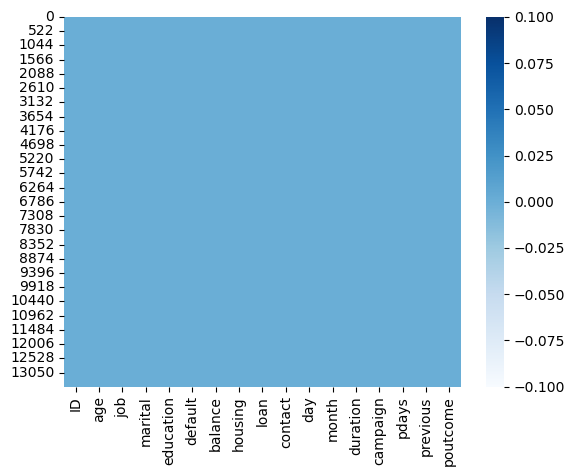

In [205]:
sns.heatmap(data.isnull(),cmap='Blues')

as we can see in this dataset we do not have any null values

In [206]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64


32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64


blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


no     13334
yes      230
Name: default, dtype: int64


 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: 

In [207]:
data.nunique().to_frame('no of unique values')

,no of unique values
ID,13564
age,75
job,12
marital,3
education,4
default,2
balance,4292
housing,2
loan,2
contact,3


In [208]:
data.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


as we can see in the 'balance','duration','pdays' features mean value is greater than the median(50%) value it means our this feature is right skewed

and in the 'age','balance','day','duration','campaign','pdays','previous' in this features we have long difference it means there might be outliers are present in the database

# separating features

In [209]:
numerical_col=[]
categorical_col=[]

for i in data.columns:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
    else :
        numerical_col.append(i)
        
print('categorical_col',categorical_col)
print('\n')
print('numerical_col',numerical_col)

categorical_col ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


numerical_col ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


# Data Analysis

In [210]:
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


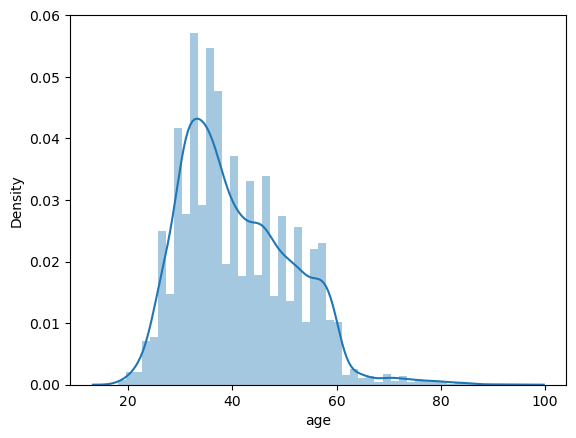

In [211]:
sns.distplot(data['age'])
plt.show()

<Axes: xlabel='age', ylabel='Count'>

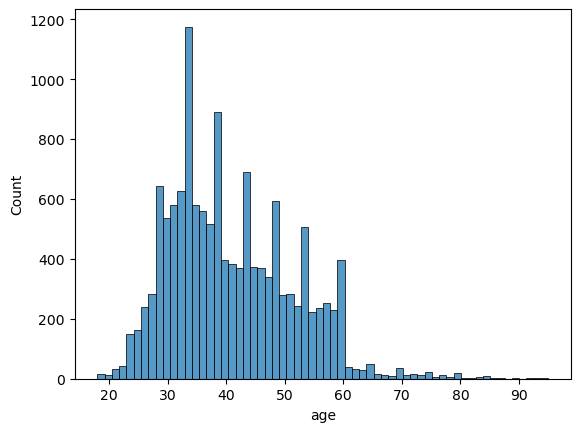

In [212]:
sns.histplot(data['age'])

here we can see between the 30 to 35 frequancy is bit high it means our most off the data are liening between this range

In [213]:
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


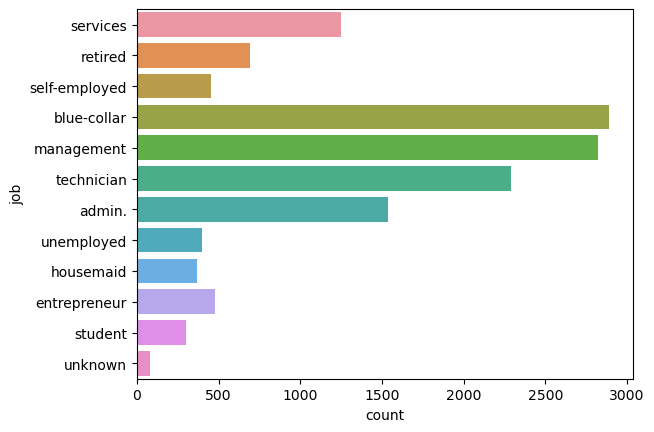

In [214]:
sns.countplot(y='job',data=data)
plt.show()

the  'blue-collar','technician','management' jobs count are high it means our most off the customers do the jobs of ('management','technician','management')

married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


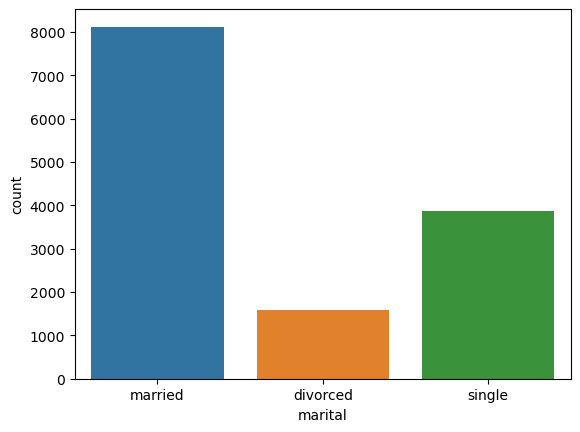

In [215]:
print(data['marital'].value_counts())
sns.countplot(x='marital',data=data)
plt.show()

the count of ('married)'  is high than the divorced,single.

secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


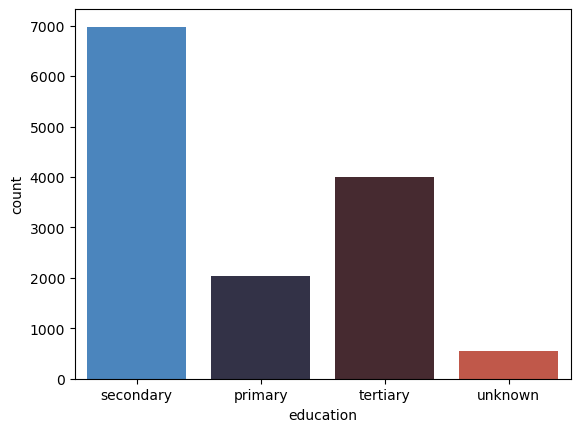

In [216]:
print(data['education'].value_counts())
sns.countplot(x='education',data=data,palette='icefire')
plt.show()

no     13334
yes      230
Name: default, dtype: int64


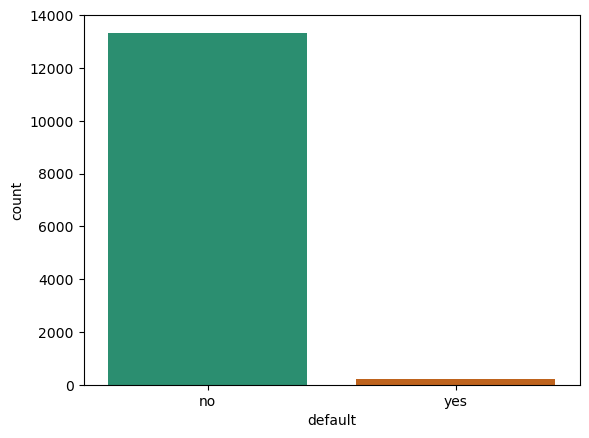

In [217]:
print(data['default'].value_counts())
sns.countplot(x='default',data=data,palette='Dark2')
plt.show()

in the above countplot we can get we do not much default credit customer

yes    7546
no     6018
Name: housing, dtype: int64


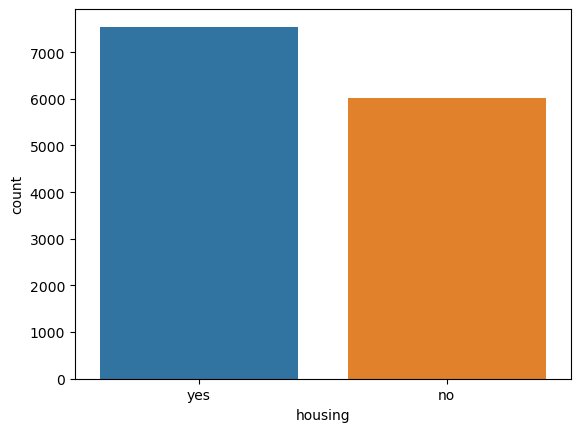

In [218]:
print(data['housing'].value_counts())
sns.countplot(x='housing',data=data)
plt.show()

as we can see there is not much difference between the person,s who are taken the housing loan and who are not taken the housing loan

In [219]:
data.head(4)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown


0    26516
1     5131
Name: loan, dtype: int64


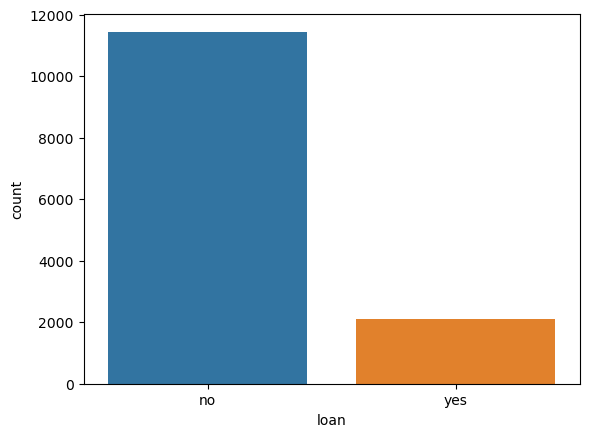

In [220]:
print(df['loan'].value_counts())
sns.countplot(x='loan',data=data)
plt.show()

0    20423
2     9177
1     2047
Name: contact, dtype: int64


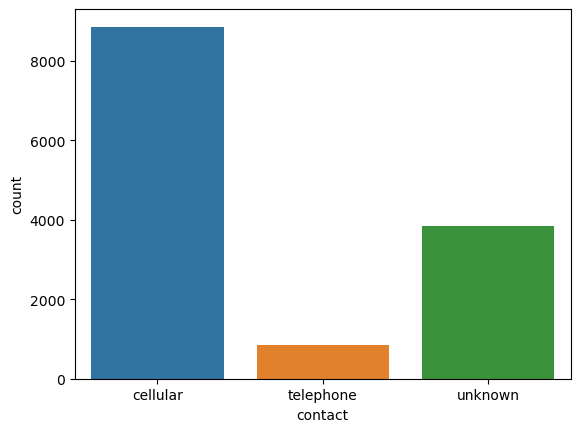

In [221]:
print(df['contact'].value_counts())
sns.countplot(x='contact',data=data)
plt.show()


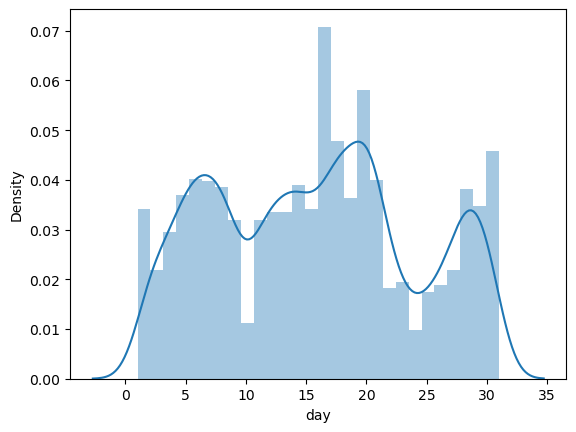

In [222]:
sns.distplot(data['day'])
plt.show()

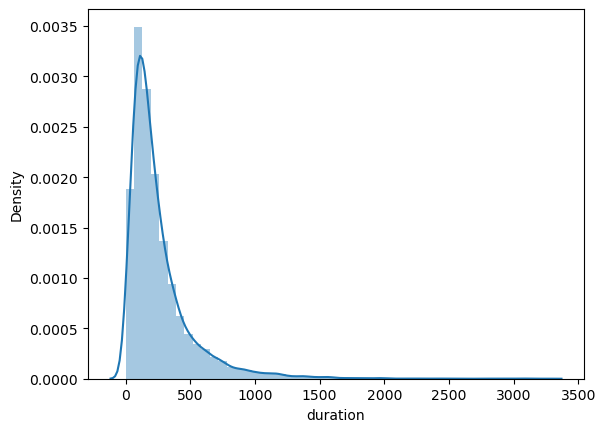

In [223]:
sns.distplot(data['duration'])
plt.show()


unknown    11030
failure     1539
other        552
success      443
Name: poutcome, dtype: int64


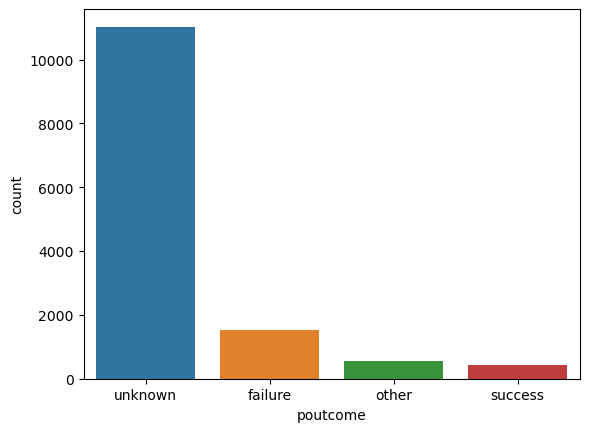

In [224]:
print(data['poutcome'].value_counts())
sns.countplot(x='poutcome',data=data)
plt.show()


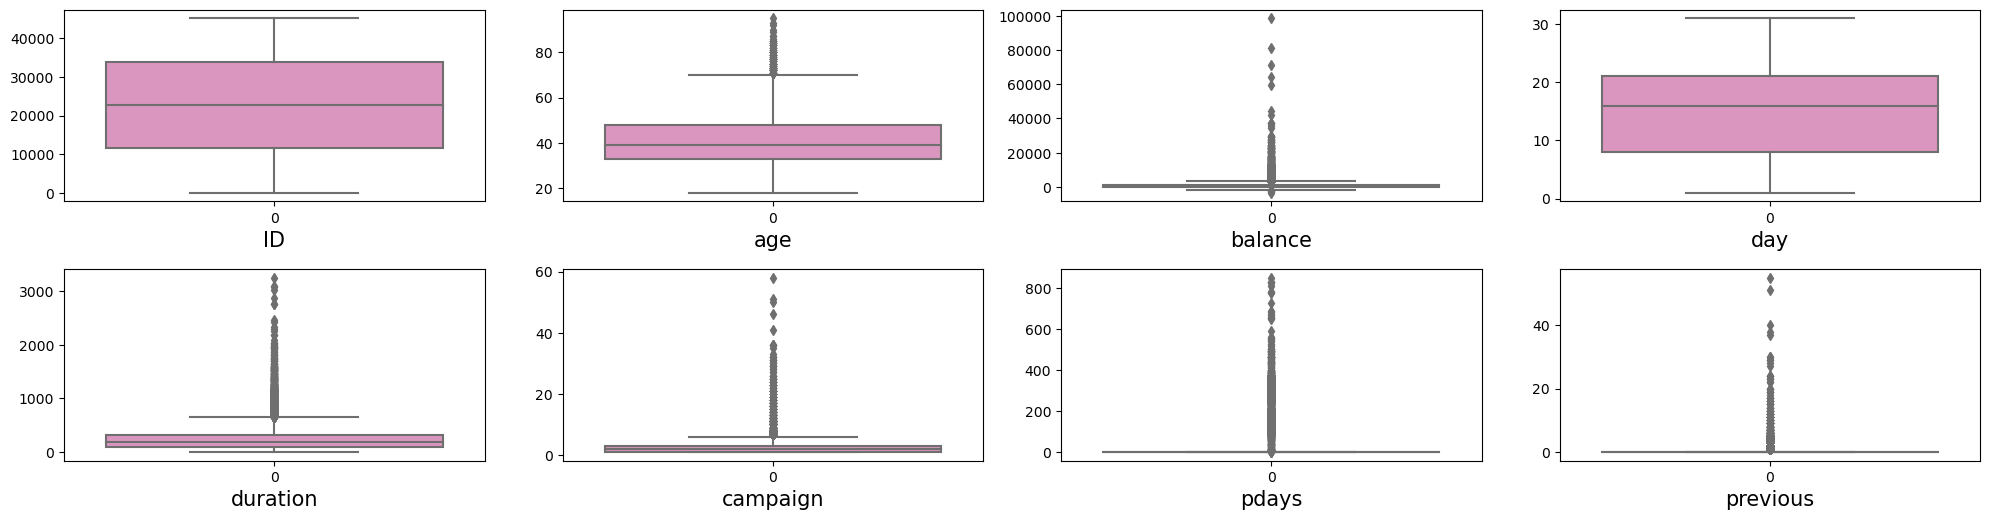

In [225]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=10:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [226]:
data.skew()

ID         -0.013625
age         0.692404
balance     9.165015
day         0.106806
duration    3.017221
campaign    4.958236
pdays       2.555601
previous    8.704583
dtype: float64

In [227]:
data['balance']=np.cbrt(data['balance'])
data['duration']=np.sqrt(data['duration'])
data['campaign']=np.sqrt(data['campaign'])
data['previous']=np.sqrt(data['previous'])

In [228]:
data.skew()


ID         -0.013625
age         0.692404
balance    -0.059591
day         0.106806
duration    1.159983
campaign    2.164078
pdays       2.555601
previous    2.658009
dtype: float64

# encoding the features using (label encoder)

In [229]:
lb=LabelEncoder()
for i in data.columns:
    if data.dtypes[i]=='object':
        data[i]=lb.fit_transform(data[i])
data

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,4.904868,1,0,0,15,8,4.472136,2.449490,-1,0.000000,3
1,40403,78,5,0,0,0,14.072751,0,0,1,1,5,19.287302,1.000000,-1,0.000000,3
2,3709,31,6,2,2,0,5.241483,1,0,2,16,8,26.000000,1.000000,-1,0.000000,3
3,37422,57,7,2,0,0,15.573360,1,0,1,13,8,8.062258,1.414214,-1,0.000000,3
4,12527,45,1,0,1,0,-8.900130,0,1,2,3,5,10.535654,1.000000,-1,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,3.556893,0,0,0,28,1,12.165525,2.000000,-1,0.000000,3
13560,11743,54,1,1,0,0,13.163613,1,0,2,20,6,12.569805,1.000000,-1,0.000000,3
13561,28292,35,5,1,0,0,6.580844,1,0,0,29,4,11.661904,1.000000,-1,0.000000,3
13562,45163,29,0,2,1,0,7.741753,0,0,0,9,9,14.422205,1.414214,91,1.732051,2


# standard scaling using (standard scaler)

In [255]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(data),columns=data.columns)
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.211134,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.388757,0.893033,-0.429564,-0.704444,-0.089124,0.829938,-1.519419,1.412134,-0.418199,-0.430532,0.452163
1,1.362131,3.499987,0.196760,-1.914173,-1.642982,-0.131336,1.009579,-1.119779,-0.429564,0.413763,-1.778340,-0.165753,0.699238,-0.807892,-0.418199,-0.430532,0.452163
2,-1.461882,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.337414,0.893033,-0.429564,1.531969,0.031534,0.829938,1.704504,-0.807892,-0.418199,-0.430532,0.452163
3,1.132710,1.519549,0.807551,1.360988,-1.642982,-0.131336,1.238460,0.893033,-0.429564,0.413763,-0.330440,0.829938,-0.981778,-0.173486,-0.418199,-0.430532,0.452163
4,-0.783238,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-2.494370,-1.119779,2.327941,1.531969,-1.537023,-0.165753,-0.611372,-0.807892,-0.418199,-0.430532,0.452163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,0.058563,-0.177969,-0.108636,-0.276592,1.040875,-0.131336,-0.594357,-1.119779,-0.429564,-0.704444,1.479434,-1.493340,-0.367289,0.723699,-0.418199,-0.430532,0.452163
13560,-0.843576,1.236630,-1.024823,-0.276592,-1.642982,-0.131336,0.870912,0.893033,-0.429564,1.531969,0.514168,0.166144,-0.306746,-0.807892,-0.418199,-0.430532,0.452163
13561,0.430055,-0.555195,0.196760,-0.276592,-1.642982,-0.131336,-0.133128,0.893033,-0.429564,-0.704444,1.600092,-0.497650,-0.442709,-0.807892,-0.418199,-0.430532,0.452163
13562,1.728467,-1.121034,-1.330219,1.360988,-0.301053,-0.131336,0.043941,-1.119779,-0.429564,-0.704444,-0.813073,1.161835,-0.029338,-0.173486,0.483926,2.015324,-0.542830


# checking correlation of features

In [232]:
corr=data.corr()
corr

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,1.000000,0.018874,0.065762,0.070859,0.090366,-0.056901,0.136953,-0.166996,-0.079589,-0.718882,-0.056813,-0.154451,0.027774,-0.114937,0.441437,0.456852,-0.449871
age,0.018874,1.000000,-0.024413,-0.396771,-0.117274,-0.022243,0.100216,-0.189573,-0.022863,0.024945,-0.004622,-0.051712,-0.004603,0.012314,-0.027797,-0.002442,0.009334
job,0.065762,-0.024413,1.000000,0.052579,0.158185,-0.010780,0.021025,-0.125409,-0.018603,-0.090929,0.027381,-0.100924,0.010191,0.021047,-0.028884,0.000147,0.020020
marital,0.070859,-0.396771,0.052579,1.000000,0.110982,-0.000793,0.025875,-0.012039,-0.059223,-0.036893,0.000419,-0.014271,0.010004,-0.013997,0.017854,0.019328,-0.010196
education,0.090366,-0.117274,0.158185,0.110982,1.000000,-0.020382,0.069535,-0.080032,-0.054845,-0.108417,0.033917,-0.060441,-0.002381,0.008292,0.003763,0.032309,-0.020194
default,-0.056901,-0.022243,-0.010780,-0.000793,-0.020382,1.000000,-0.180709,0.008097,0.066402,0.018585,0.007931,0.027885,-0.007784,0.013385,-0.030713,-0.035641,0.034386
balance,0.136953,0.100216,0.021025,0.025875,0.069535,-0.180709,1.000000,-0.095415,-0.149953,-0.048099,-0.005985,-0.006737,0.037341,-0.032005,0.031551,0.069220,-0.054635
housing,-0.166996,-0.189573,-0.125409,-0.012039,-0.080032,0.008097,-0.095415,1.000000,0.053394,0.171775,-0.033407,0.271594,0.007795,-0.037724,0.136453,0.068134,-0.116616
loan,-0.079589,-0.022863,-0.018603,-0.059223,-0.054845,0.066402,-0.149953,0.053394,1.000000,-0.015035,0.003121,0.017189,-0.013031,0.006288,-0.028705,-0.030660,0.025735
contact,-0.718882,0.024945,-0.090929,-0.036893,-0.108417,0.018585,-0.048099,0.171775,-0.015035,1.000000,-0.030176,0.356889,-0.043178,0.007199,-0.244138,-0.252372,0.272425


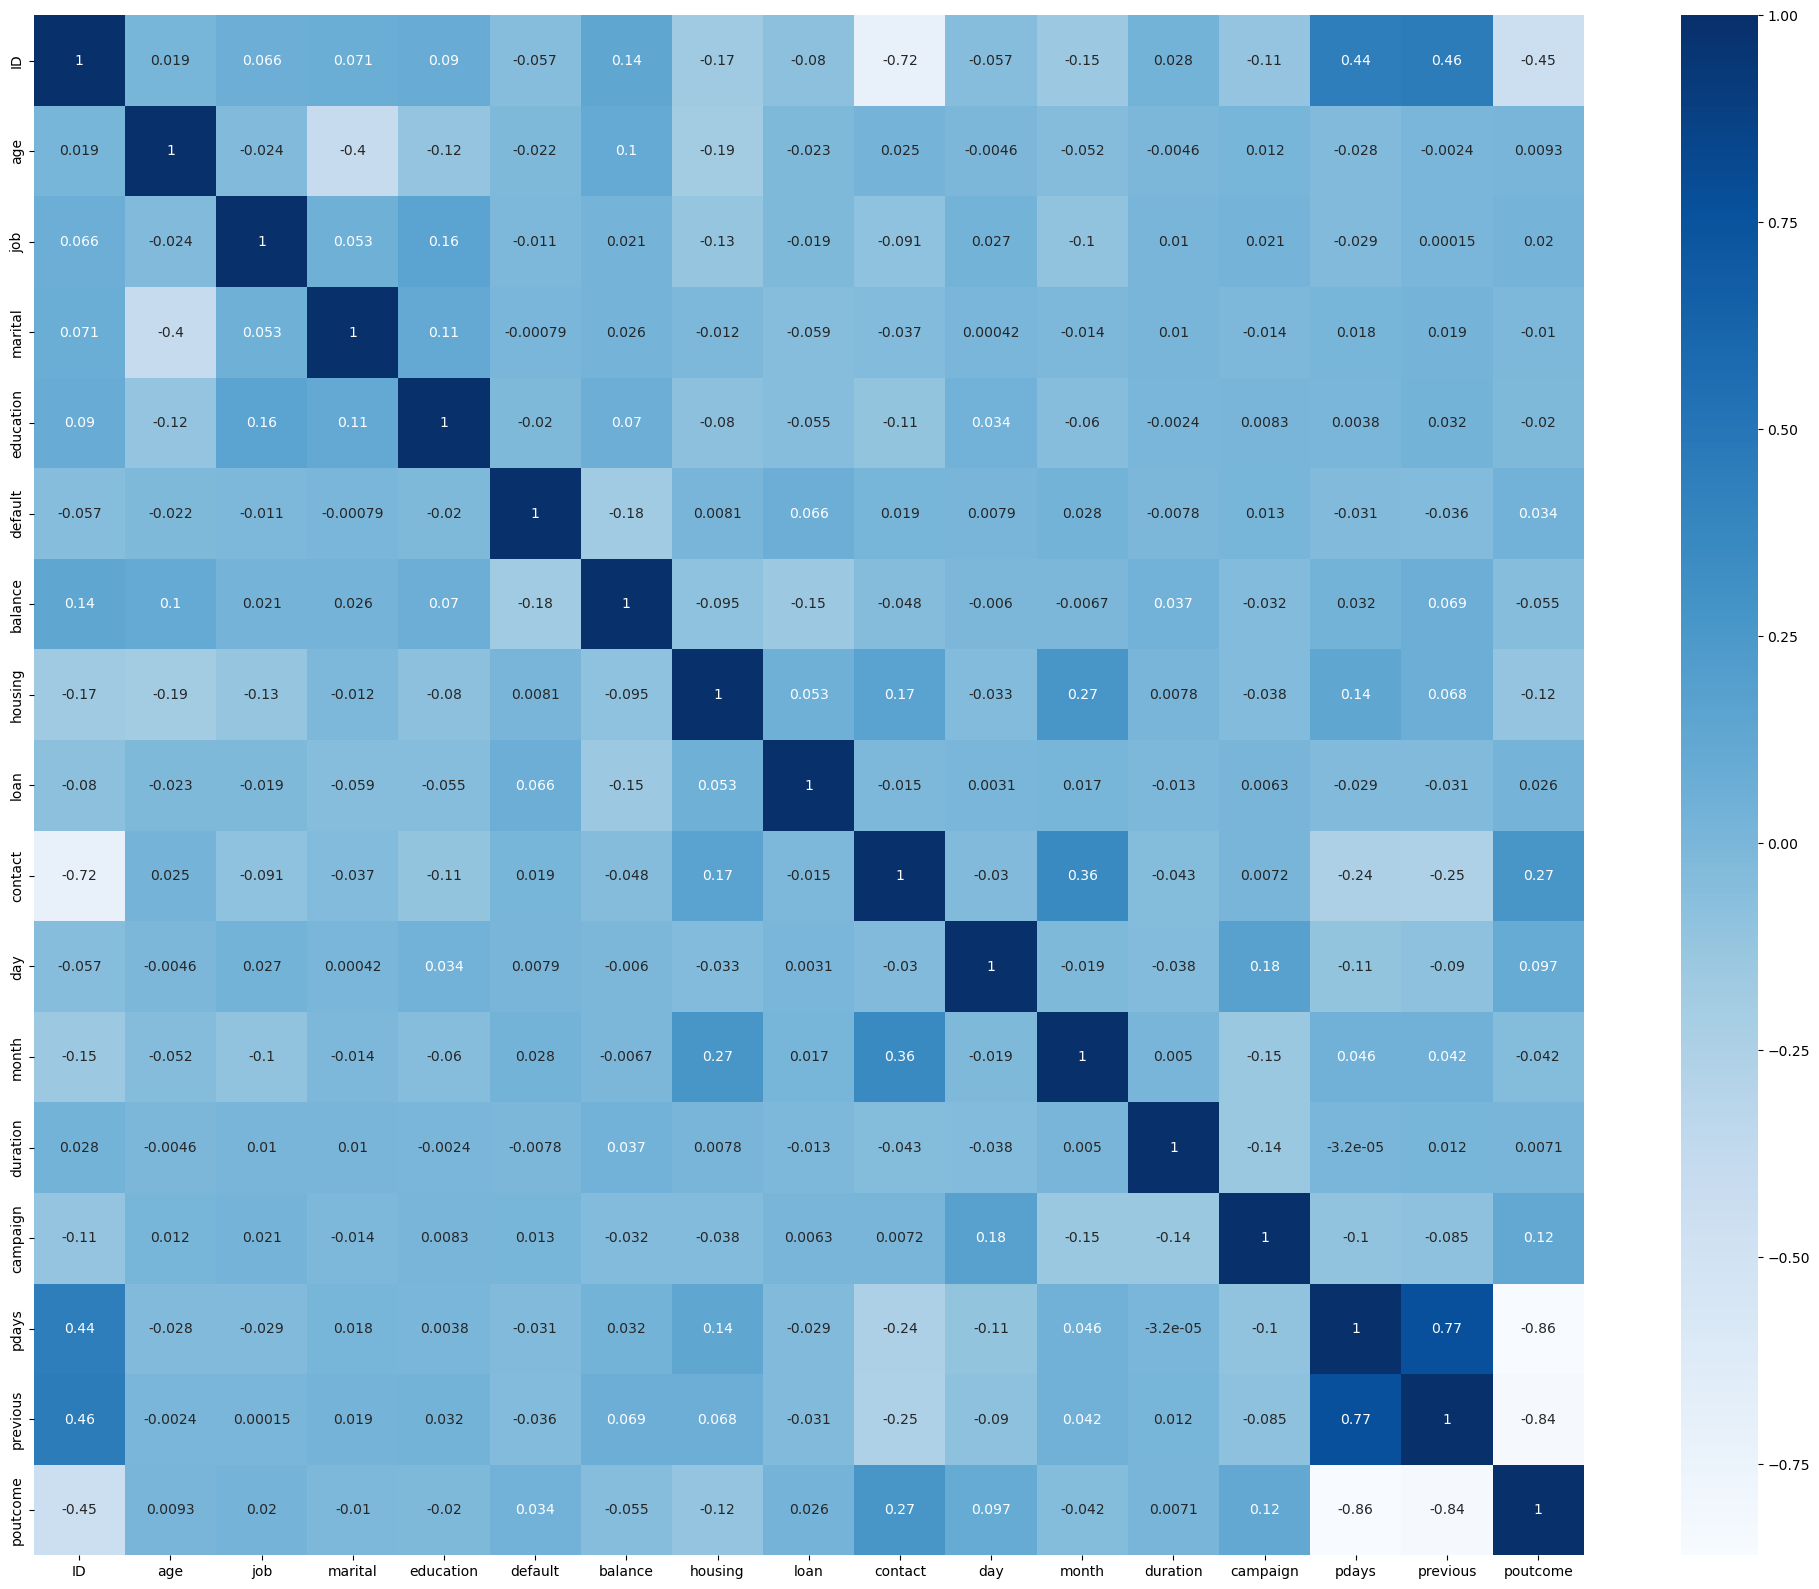

In [233]:
plt.figure(figsize=(25,20))
sns.heatmap(corr,cmap='Blues',annot=True)
plt.show()

# checking variance inflation factor

In [256]:
vif_test=pd.DataFrame()
vif_test['variables']=x.columns
vif_test['VIF values']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_test

,variables,VIF values
0,ID,2.785995
1,age,1.281351
2,job,1.048559
3,marital,1.219886
4,education,1.066015
5,default,1.038428
6,balance,1.096673
7,housing,1.219171
8,loan,1.045642
9,contact,2.507893


here we have to drop the 'pdays' because in the train file we droped this feature because it was creating the multicolinearity issue

In [278]:
x=x.drop('pdays',axis=1)

# predicting the value by train model

In [279]:
score=joblib.load('bank_analysis.pkl')

In [281]:
output=score.predict(x)

In [285]:
predi=pd.DataFrame(score.predict(x))
predi

,0
0,0
1,1
2,1
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,1
